# Overview

Content: 
1. Read in antismash output
2. retreive Regulators seqs from differet families e.g. all LuxR tfs
3. generate primers
4. add overhangs
5. Retrieve primers and make a xlsx file to get from IDT. 


In [1]:
from teemi.design.fetch_sequences import read_genbank_files
import pandas as pd

In [2]:
go4010 = read_genbank_files('data_for_tf_activation_project/Go40110_flye_polish_actinoannotPFAM_antismash7/Go40110_flye_polish_actinoannotPFAM.gbk')[0]

In [3]:
f'Lenght of the genome {len(go4010):,} bp'

'Lenght of the genome 9,637,008 bp'

In [4]:
go4010

SeqRecord(seq=Seq('CAGCTCCGGCACGGAAAGAGGCTGGTCTGGTTTTGTGGGGTGGGGGCTGGGGTT...AGG'), id='.', name='Exported', description='Streptomyces reticuli_0.928 strain strain', dbxrefs=[])

How many clusters

In [5]:
# How many genes do we have?
locus_tags = []
qualifiers = []
cds = []

for feature in go4010.features:
    if feature.type == 'CDS': 
        # getting the locus tag if we see cds
        locus_tags.append(feature.qualifiers['locus_tag'][0])
        qualifiers.append(feature.qualifiers)

        # All CDS features
        cds.append(feature)

        
print('Total coding sequences : ', len(locus_tags))    

Total coding sequences :  8154


In [6]:
cds[:10]

[SeqFeature(SimpleLocation(ExactPosition(202), ExactPosition(1000), strand=1), type='CDS', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(3087), ExactPosition(3231), strand=1), type='CDS', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(6166), ExactPosition(7426), strand=1), type='CDS', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(9178), ExactPosition(9358), strand=1), type='CDS', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(9504), ExactPosition(9690), strand=1), type='CDS', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(14019), ExactPosition(14781), strand=1), type='CDS', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(15280), ExactPosition(15472), strand=-1), type='CDS', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(16206), ExactPosition(16326), strand=-1), type='CDS', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(16859), ExactPosition(17699), strand=-1), type='CDS', qualifiers=...),
 SeqFeatu

Lets retrieve the locus_tag for all transcriptional regualtors

In [7]:
regulators = []
regulator_descriptions = []
for qualifier in qualifiers: 
    if 'gene_kind' in qualifier:
        if 'regulatory' in qualifier['gene_functions'][0]:
            #print(qualifier['gene_functions'])
            if 'LuxR' in qualifier['gene_functions'][0] or 'SARP' in qualifier['gene_functions'][0]: 
                print(qualifier['gene_functions'][0])
                regulator_descriptions.append(qualifier['gene_functions'][0][30:])
                regulators.append(qualifier)
                
len(regulators)

regulatory (smcogs) SMCOG1016:LuxR family DNA-binding response regulator (Score: 187.1; E-value: 4.1e-57)
regulatory (smcogs) SMCOG1149:LuxR family transcriptional regulator (Score: 972.3; E-value: 4.8e-294)
regulatory (smcogs) SMCOG1016:LuxR family DNA-binding response regulator (Score: 166.8; E-value: 6.4e-51)
regulatory (smcogs) SMCOG1041:transcriptional regulator, SARP family (Score: 314.4; E-value: 3.3e-95)
regulatory (smcogs) SMCOG1041:transcriptional regulator, SARP family (Score: 259.2; E-value: 1.5e-78)
regulatory (smcogs) SMCOG1016:LuxR family DNA-binding response regulator (Score: 66; E-value: 4.5e-20)
regulatory (smcogs) SMCOG1016:LuxR family DNA-binding response regulator (Score: 143.4; E-value: 9.7e-44)
regulatory (smcogs) SMCOG1041:transcriptional regulator, SARP family (Score: 266.8; E-value: 7.8e-81)
regulatory (smcogs) SMCOG1016:LuxR family DNA-binding response regulator (Score: 151.1; E-value: 4.3e-46)
regulatory (smcogs) SMCOG1016:LuxR family DNA-binding response re

18

In [8]:
regulator_descriptions

['LuxR family DNA-binding response regulator (Score: 187.1; E-value: 4.1e-57)',
 'LuxR family transcriptional regulator (Score: 972.3; E-value: 4.8e-294)',
 'LuxR family DNA-binding response regulator (Score: 166.8; E-value: 6.4e-51)',
 'transcriptional regulator, SARP family (Score: 314.4; E-value: 3.3e-95)',
 'transcriptional regulator, SARP family (Score: 259.2; E-value: 1.5e-78)',
 'LuxR family DNA-binding response regulator (Score: 66; E-value: 4.5e-20)',
 'LuxR family DNA-binding response regulator (Score: 143.4; E-value: 9.7e-44)',
 'transcriptional regulator, SARP family (Score: 266.8; E-value: 7.8e-81)',
 'LuxR family DNA-binding response regulator (Score: 151.1; E-value: 4.3e-46)',
 'LuxR family DNA-binding response regulator (Score: 175.3; E-value: 1.7e-53)',
 'transcriptional regulator, SARP family (Score: 252.9; E-value: 1.2e-76)',
 'LuxR family DNA-binding response regulator (Score: 84.7; E-value: 8.6e-26)',
 'transcriptional regulator, SARP family (Score: 511.2; E-value:

In [9]:
locus_tags_to_search_for = []
for qualifier in regulators: 
    locus_tags_to_search_for.append(qualifier['locus_tag'][0])

In [10]:
print(f'Total sequences within these two regulator families: {len(locus_tags_to_search_for)}')
locus_tags_to_search_for

Total sequences within these two regulator families: 18


['LLPMBPKK_00292',
 'LLPMBPKK_00328',
 'LLPMBPKK_00586',
 'LLPMBPKK_01488',
 'LLPMBPKK_02197',
 'LLPMBPKK_02209',
 'LLPMBPKK_02563',
 'LLPMBPKK_02633',
 'LLPMBPKK_02635',
 'LLPMBPKK_02637',
 'LLPMBPKK_02662',
 'LLPMBPKK_05992',
 'LLPMBPKK_06337',
 'LLPMBPKK_06422',
 'LLPMBPKK_06907',
 'LLPMBPKK_07531',
 'LLPMBPKK_07744',
 'LLPMBPKK_07949']

In [11]:
# Manual LuxR 11
# manual SARP 8

### In which gene clusters are they found?

In [12]:
import sys
import os
def list_of_objects_in_a_dir(dir_path:str): 
    """List all objects in a directory.
    
    Parameters
    ----------
    dir_path : str
        The path to the directory.
        
    Returns
    -------
    list
        A list of the objects in the directory.
    """
    # list to store files
    list_of_files = []

    # Iterate directory
    for path in os.listdir(dir_path):
        # check if current path is a file
        if os.path.isfile(os.path.join(dir_path, path)):
            list_of_files.append(path)
            
    return list_of_files

regions_names = list_of_objects_in_a_dir('data_for_tf_activation_project/Go40110_flye_polish_actinoannotPFAM_antismash7')

genbank_regions = []
for gb in regions_names: 
    if gb.endswith('.gbk') and gb.startswith('..'): 
        genbank_regions.append(gb)

genbank_regions_sorted = sorted(genbank_regions)



In [13]:
# lets parse: 
all_genbanks = []
for region in genbank_regions_sorted: 
    all_genbanks.append( read_genbank_files(f'data_for_tf_activation_project/Go40110_flye_polish_actinoannotPFAM_antismash7/{region}')[0])

In [14]:
regions_for_each_locus_tag = []
for lc_tag in locus_tags_to_search_for: 
    for i in range(len(all_genbanks)): 
       for feature in all_genbanks[i].features:
            if feature.type == "CDS":
                if feature.qualifiers['locus_tag'][0] == lc_tag: 
                    # getting the locus tag if we see cds
                    locus_tag_and_region = {'locus_tag':lc_tag, 'region': f'region {i+1}'}
                    regions_for_each_locus_tag.append(locus_tag_and_region)
regions_df = pd.DataFrame(regions_for_each_locus_tag, columns =['locus_tag', 'region'])
regions_df['regulator_number'] = [f'Reg {i+1}' for i in range(len(regions_df))]

regions_df['description'] = regulator_descriptions
regions_df

,locus_tag,region,regulator_number,description
0,LLPMBPKK_00292,region 1,Reg 1,LuxR family DNA-binding response regulator (Sc...
1,LLPMBPKK_00328,region 1,Reg 2,LuxR family transcriptional regulator (Score: ...
2,LLPMBPKK_00586,region 4,Reg 3,LuxR family DNA-binding response regulator (Sc...
3,LLPMBPKK_01488,region 10,Reg 4,"transcriptional regulator, SARP family (Score:..."
4,LLPMBPKK_02197,region 12,Reg 5,"transcriptional regulator, SARP family (Score:..."
5,LLPMBPKK_02209,region 12,Reg 6,LuxR family DNA-binding response regulator (Sc...
6,LLPMBPKK_02563,region 13,Reg 7,LuxR family DNA-binding response regulator (Sc...
7,LLPMBPKK_02633,region 14,Reg 8,"transcriptional regulator, SARP family (Score:..."
8,LLPMBPKK_02635,region 14,Reg 9,LuxR family DNA-binding response regulator (Sc...
9,LLPMBPKK_02637,region 14,Reg 10,LuxR family DNA-binding response regulator (Sc...


In [15]:
# The interesting BGCs were 14, 28, 38?

### All regulators

In [16]:
## If we just look at all regulators
transcriptional_regulators = []
for qualifier in qualifiers: 
    if 'product' in qualifier: 
        if 'transcriptional regulator' in  qualifier['product'][0]: 
            tf = [qualifier['locus_tag'],qualifier['product']]
            transcriptional_regulators.append(tf)
print(f'Total transcriptional regulators : {len(transcriptional_regulators)}')
transcriptional_regulators[:10]

Total transcriptional regulators : 531


[[['LLPMBPKK_00020'], ['XRE family transcriptional regulator']],
 [['LLPMBPKK_00064'], ['XRE family transcriptional regulator']],
 [['LLPMBPKK_00191'], ['LacI family transcriptional regulator']],
 [['LLPMBPKK_00217'], ['MerR family transcriptional regulator']],
 [['LLPMBPKK_00244'], ['HxlR family transcriptional regulator']],
 [['LLPMBPKK_00260'], ['LacI family transcriptional regulator']],
 [['LLPMBPKK_00283'], ['TetR family transcriptional regulator']],
 [['LLPMBPKK_00293'], ['MarR family transcriptional regulator']],
 [['LLPMBPKK_00328'], ['LuxR family transcriptional regulator']],
 [['LLPMBPKK_00353'], ['LysR family transcriptional regulator']]]

Lets get the sequences: 

In [17]:
from Bio.SeqRecord import SeqRecord
from Bio.SeqFeature import SeqFeature, FeatureLocation



In [18]:
my_regulator_sequences = []
for i in range(len(cds)): 
    if cds[i].qualifiers['locus_tag'][0] in locus_tags_to_search_for: 
        feature_sequence = SeqRecord(cds[i].extract(go4010.seq), id = cds[i].qualifiers['locus_tag'][0],name = cds[i].qualifiers['locus_tag'][0], description = cds[i].qualifiers['gene_functions'][0] )
        
        # annotation
        feature_location = FeatureLocation(start=0, end=len(feature_sequence))
        my_feature = SeqFeature(location=feature_location, type='gene', 
                                qualifiers={"name": cds[i].qualifiers['locus_tag'][0], 
                                            "product": cds[i].qualifiers['locus_tag'][0],
                                            "description": cds[i].qualifiers['gene_functions'][0]})
        feature_sequence.features.append(my_feature)
        
        # saving feature
        my_regulator_sequences.append(feature_sequence)

my_regulator_sequences

[SeqRecord(seq=Seq('GTGACCCAGCCCGCCGCCGACCGCCACATCCCCCAGGCCCCGAACCGGATGCCG...TGA'), id='LLPMBPKK_00292', name='LLPMBPKK_00292', description='regulatory (smcogs) SMCOG1016:LuxR family DNA-binding response regulator (Score: 187.1; E-value: 4.1e-57)', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGATGAAGGGGATGCCGCCGGTGGCCCCGCCTGCTGGTTCCGGTTCGTACGGA...TGA'), id='LLPMBPKK_00328', name='LLPMBPKK_00328', description='regulatory (smcogs) SMCOG1149:LuxR family transcriptional regulator (Score: 972.3; E-value: 4.8e-294)', dbxrefs=[]),
 SeqRecord(seq=Seq('GTGACCGACACCCCCATCCGTCTCCTCCTGGCCGACGACCACCCCGTGGTCCGC...TGA'), id='LLPMBPKK_00586', name='LLPMBPKK_00586', description='regulatory (smcogs) SMCOG1016:LuxR family DNA-binding response regulator (Score: 166.8; E-value: 6.4e-51)', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGGGCCGTGTGAGCGGGGACACATACGGCGGGGAACGGATCGACTTCCGCAAC...TGA'), id='LLPMBPKK_01488', name='LLPMBPKK_01488', description='regulatory (smcogs) SMCOG1041:transcriptional regulator, SARP family (Score: 

In [19]:
with open('data_for_tf_activation_project/GOE_regulators/GOE_regulators.gb', 'w') as outfile:
    for i in range(0, len(my_regulator_sequences)):
        my_regulator_sequences[i].annotations["molecule_type"] = "DNA"
        print(my_regulator_sequences[i].format("gb"), file = outfile)

In [20]:
f'Number of regulator sequences: {len(my_regulator_sequences)}'

'Number of regulator sequences: 18'

Lets make amplicons 

In [21]:
from pydna.dseqrecord import Dseqrecord

In [22]:
clean_seq = [Dseqrecord(seq) for seq in my_regulator_sequences]
clean_seq

[Dseqrecord(-813),
 Dseqrecord(-2859),
 Dseqrecord(-636),
 Dseqrecord(-2319),
 Dseqrecord(-822),
 Dseqrecord(-1353),
 Dseqrecord(-654),
 Dseqrecord(-813),
 Dseqrecord(-609),
 Dseqrecord(-648),
 Dseqrecord(-786),
 Dseqrecord(-888),
 Dseqrecord(-3420),
 Dseqrecord(-1830),
 Dseqrecord(-1221),
 Dseqrecord(-2421),
 Dseqrecord(-2916),
 Dseqrecord(-2304)]

In [23]:
import requests
import json
from pydna.design import primer_design


def primer_tm_neb(primer, conc=0.4, prodcode="q5-0"):
    """Calculates a single primers melting temp from NEB.

    Parameters
    ----------
    primer1 : str
    conc : float
    prodcode : str
        find product codes on nebswebsite: https://tmapi.neb.com/docs/productcodes

    Returns
    -------
    tm : int
        primer melting temperature

    """

    url = "https://tmapi.neb.com/tm/batch"
    seqpairs = [[primer]]

    input = {"seqpairs": seqpairs, "conc": conc, "prodcode": prodcode}
    headers = {"content-type": "application/json"}
    res = requests.post(url, data=json.dumps(input), headers=headers)

    r = json.loads(res.content)

    if r["success"]:
        for row in r["data"]:
            return row["tm1"]
    else:
        print("request failed")
        print(r["error"][0])


def primer_ta_neb(primer1, primer2, conc=0.4, prodcode="q5-0"):
    """Calculates primer pair melting temp TA,  from NEB.

    Parameters
    ----------
    primer1 : str
        first primer to be used for finding the optimal ta
    primer2 : str
        second primer to be used for finding the optimal ta
    conc : float
    prodcode : str
        find product codes on nebswebsite: https://tmapi.neb.com/docs/productcodes

    Returns
    -------
    ta : int
        primer pair annealing temp

    """

    url = "https://tmapi.neb.com/tm/batch"
    seqpairs = [[primer1, primer2]]

    input = {"seqpairs": seqpairs, "conc": conc, "prodcode": prodcode}
    headers = {"content-type": "application/json"}
    res = requests.post(url, data=json.dumps(input), headers=headers)

    r = json.loads(res.content)

    if r["success"]:
        for row in r["data"]:
            return row["ta"]

    else:
        print("request failed")
        print(r["error"][0])



def primer_tm_neb_taq(primer, conc=0.4, prodcode="onetaq-3"):
    """Calculates a single primers melting temp from NEB.

    Parameters
    ----------
    primer1 : str
    conc : float
    prodcode : str
        find product codes on nebswebsite: https://tmapi.neb.com/docs/productcodes

    Returns
    -------
    tm : int
        primer melting temperature

    """

    url = "https://tmapi.neb.com/tm/batch"
    seqpairs = [[primer]]

    input = {"seqpairs": seqpairs, "conc": conc, "prodcode": prodcode}
    headers = {"content-type": "application/json"}
    res = requests.post(url, data=json.dumps(input), headers=headers)

    r = json.loads(res.content)

    if r["success"]:
        for row in r["data"]:
            return row["tm1"]
    else:
        print("request failed")
        print(r["error"][0])


def primer_ta_neb_taq(primer1, primer2, conc=0.4, prodcode="onetaq-3"):
    """Calculates primer pair melting temp TA,  from NEB.

    Parameters
    ----------
    primer1 : str
        first primer to be used for finding the optimal ta
    primer2 : str
        second primer to be used for finding the optimal ta
    conc : float
    prodcode : str
        find product codes on nebswebsite: https://tmapi.neb.com/docs/productcodes

    Returns
    -------
    ta : int
        primer pair annealing temp

    """

    url = "https://tmapi.neb.com/tm/batch"
    seqpairs = [[primer1, primer2]]

    input = {"seqpairs": seqpairs, "conc": conc, "prodcode": prodcode}
    headers = {"content-type": "application/json"}
    res = requests.post(url, data=json.dumps(input), headers=headers)

    r = json.loads(res.content)

    if r["success"]:
        for row in r["data"]:
            return row["ta"]

    else:
        print("request failed")
        print(r["error"][0])

def make_amplicons(
    list_of_amplicons: list, target_tm=58, limit=10, tm_function=primer_tm_neb):
    """Generates pydna.amplicons which contains primers with a target temperature.

    Parameters
    ----------
    list_of_amplicons : list
        list of pydna.Dseqrecords
    target_tm : int
        representing the target melting temperature for the primers (default=55)
    limit: int
        representing the minimum primer size (default=5)
    tm_function : function
        for calculating primer melting temperature (default=primer_tm_neb)

    Returns:
    amplicons: list
        list of amplicon objects with designed primer sequences
    """
    amplicons = []
    for i in range(len(list_of_amplicons)):
        amplicon = primer_design(
            list_of_amplicons[i],
            target_tm=target_tm,
            limit=limit,
            tm_function=tm_function,
        )
        amplicon.name = list_of_amplicons[i].name+"_amplicon"
        amplicon.id = list_of_amplicons[i].id

        amplicons.append(amplicon)

    return amplicons


import pandas as pd
import primer3

def analyze_primers_and_hairpins(forward_list, reverse_list, temperature):
    results = []

    if len(forward_list) != len(reverse_list):
        raise ValueError("The forward and reverse lists must be of equal length.")

    for i in range(len(forward_list)):
        # Analyzing homodimers and heterodimers
        homodimer_forward = primer3.bindings.calc_homodimer(forward_list[i], temp_c=temperature).todict()
        homodimer_reverse = primer3.bindings.calc_homodimer(reverse_list[i], temp_c=temperature).todict()
        heterodimer = primer3.bindings.calc_heterodimer(forward_list[i], reverse_list[i], temp_c=temperature).todict()

        # Analyzing hairpins
        hairpin_forward = primer3.bindings.calc_hairpin(forward_list[i], temp_c=temperature).todict()
        hairpin_reverse = primer3.bindings.calc_hairpin(reverse_list[i], temp_c=temperature).todict()

        row = {
            "Primer Pair": f"Forward-{i+1} & Reverse-{i+1}",
            "Homodimer Forward tm": homodimer_forward['tm'],
            "Homodimer Forward deltaG (kcal/mol)": homodimer_forward['dg'] / 1000,
            "Homodimer Reverse tm": homodimer_reverse['tm'],
            "Homodimer Reverse deltaG (kcal/mol)": homodimer_reverse['dg'] / 1000,
            "Heterodimer tm": heterodimer['tm'],
            "Heterodimer deltaG (kcal/mol)": heterodimer['dg'] / 1000,
            "Hairpin Forward structure_found": hairpin_forward['structure_found'],
            "Hairpin Forward tm": hairpin_forward['tm'],
            "Hairpin Forward deltaG (kcal/mol)": hairpin_forward['dg'] / 1000,
            "Hairpin Reverse structure_found": hairpin_reverse['structure_found'],
            "Hairpin Reverse tm": hairpin_reverse['tm'],
            "Hairpin Reverse deltaG (kcal/mol)": hairpin_reverse['dg'] / 1000
        }
        results.append(row)

    df = pd.DataFrame(results)
    return df


In [24]:
amplicons = make_amplicons(clean_seq,
                           target_tm=65, # targtet temp
                           limit=15,  # min length of primers
                           tm_function = primer_tm_neb)

In [25]:
amplicons

[Amplicon(813),
 Amplicon(2859),
 Amplicon(636),
 Amplicon(2319),
 Amplicon(822),
 Amplicon(1353),
 Amplicon(654),
 Amplicon(813),
 Amplicon(609),
 Amplicon(648),
 Amplicon(786),
 Amplicon(888),
 Amplicon(3420),
 Amplicon(1830),
 Amplicon(1221),
 Amplicon(2421),
 Amplicon(2916),
 Amplicon(2304)]

Fetching primers and calculating TA

In [26]:
data = []
for amplicon, gene_id in zip(amplicons, clean_seq):
    forward_primer_seq = str(amplicon.forward_primer.seq)
    reverse_primer_seq = str(amplicon.reverse_primer.seq)
    
    f_tm = primer_tm_neb(forward_primer_seq)
    r_tm = primer_tm_neb(reverse_primer_seq)
    f_tm_taq = primer_tm_neb_taq(forward_primer_seq)
    r_tm_taq = primer_tm_neb_taq(reverse_primer_seq)
    ta = primer_ta_neb(forward_primer_seq, reverse_primer_seq)
    ta_taq = primer_ta_neb_taq(forward_primer_seq, reverse_primer_seq)

    data.append({
        'template': str(gene_id.id),
        'f_primer_anneal(5-3)': forward_primer_seq,
        'r_primer_anneal(5-3)': reverse_primer_seq,
        'f_tm_q5': f_tm,
        'r_tm_q5': r_tm,
        'ta_q5': ta,
        'f_tm_taq': f_tm_taq,
        'r_tm_taq': r_tm_taq,
        'ta_taq':ta_taq
    })

df = pd.DataFrame(data)
df

,template,f_primer_anneal(5-3),r_primer_anneal(5-3),f_tm_q5,r_tm_q5,ta_q5,f_tm_taq,r_tm_taq,ta_taq
0,LLPMBPKK_00292,GTGACCCAGCCCGCC,TCATTCGGCGGCGGAGC,70,72,71,67,68,62
1,LLPMBPKK_00328,ATGATGAAGGGGATGCCGC,TCAGCCGGAGTCGGTG,68,67,68,64,63,59
2,LLPMBPKK_00586,GTGACCGACACCCCC,TCAGCGGCGGATGAGG,65,68,66,62,64,57
3,LLPMBPKK_01488,ATGGGCCGTGTGAGCG,TCATCGGTTCCCCTCTTCTGC,69,69,70,65,65,60
4,LLPMBPKK_02197,GTGGCTCTGTTCCACATGCT,TCATGCAAGGGTCGGGAA,68,66,67,63,62,57
5,LLPMBPKK_02209,GTGGAAGTTATGGAACGGGG,TCAGGACCTGAGCCGG,65,67,66,61,63,56
6,LLPMBPKK_02563,GTGCGTGTTGTCCTAGCC,TCAGCGGTCCCGGTC,66,67,67,62,64,57
7,LLPMBPKK_02633,ATGGCGCATCTGGACATCG,CTACAGCGGGGCCAG,68,66,67,64,62,57
8,LLPMBPKK_02635,GTGATTCGGATCCTGCTCGC,CTAGACCAGCCAGCCC,68,65,66,64,61,56
9,LLPMBPKK_02637,ATGACCGACACCGACAACG,TCAGGAGCGGGCGAG,67,68,68,63,64,58


### What overhang do we want to add to the primers: 

In [27]:
from Bio.Seq import Seq

In [28]:
# String to append 5' > 3'
up_homology = "GGCGAGCAACGGAGGTACGGACAGG".upper()
dw_homology = str(Seq("CCTtccgttcgagtggcggcttgcg").reverse_complement()).upper()
print(f'reverse_primer_overhang 5prime_3prime : {dw_homology}')
#print(f'reverse_primer_overhang 3prime_5prime : {dw_homology[::-1]}')


# Append the string to each entry in the f_primer_anneal and r_primer_anneal columns
df['f_primer_sequences(5-3)'] = up_homology + df['f_primer_anneal(5-3)']
df['r_primer_sequences(5-3)'] = dw_homology + df['r_primer_anneal(5-3)'] 

reverse_primer_overhang 5prime_3prime : CGCAAGCCGCCACTCGAACGGAAGG


Full df with all primer and pcr information

In [29]:
df.to_excel('data_for_tf_activation_project/primers_and_analysis/primers_melting_temperatures.xlsx')
df

,template,f_primer_anneal(5-3),r_primer_anneal(5-3),f_tm_q5,r_tm_q5,ta_q5,f_tm_taq,r_tm_taq,ta_taq,f_primer_sequences(5-3),r_primer_sequences(5-3)
0,LLPMBPKK_00292,GTGACCCAGCCCGCC,TCATTCGGCGGCGGAGC,70,72,71,67,68,62,GGCGAGCAACGGAGGTACGGACAGGGTGACCCAGCCCGCC,CGCAAGCCGCCACTCGAACGGAAGGTCATTCGGCGGCGGAGC
1,LLPMBPKK_00328,ATGATGAAGGGGATGCCGC,TCAGCCGGAGTCGGTG,68,67,68,64,63,59,GGCGAGCAACGGAGGTACGGACAGGATGATGAAGGGGATGCCGC,CGCAAGCCGCCACTCGAACGGAAGGTCAGCCGGAGTCGGTG
2,LLPMBPKK_00586,GTGACCGACACCCCC,TCAGCGGCGGATGAGG,65,68,66,62,64,57,GGCGAGCAACGGAGGTACGGACAGGGTGACCGACACCCCC,CGCAAGCCGCCACTCGAACGGAAGGTCAGCGGCGGATGAGG
3,LLPMBPKK_01488,ATGGGCCGTGTGAGCG,TCATCGGTTCCCCTCTTCTGC,69,69,70,65,65,60,GGCGAGCAACGGAGGTACGGACAGGATGGGCCGTGTGAGCG,CGCAAGCCGCCACTCGAACGGAAGGTCATCGGTTCCCCTCTTCTGC
4,LLPMBPKK_02197,GTGGCTCTGTTCCACATGCT,TCATGCAAGGGTCGGGAA,68,66,67,63,62,57,GGCGAGCAACGGAGGTACGGACAGGGTGGCTCTGTTCCACATGCT,CGCAAGCCGCCACTCGAACGGAAGGTCATGCAAGGGTCGGGAA
5,LLPMBPKK_02209,GTGGAAGTTATGGAACGGGG,TCAGGACCTGAGCCGG,65,67,66,61,63,56,GGCGAGCAACGGAGGTACGGACAGGGTGGAAGTTATGGAACGGGG,CGCAAGCCGCCACTCGAACGGAAGGTCAGGACCTGAGCCGG
6,LLPMBPKK_02563,GTGCGTGTTGTCCTAGCC,TCAGCGGTCCCGGTC,66,67,67,62,64,57,GGCGAGCAACGGAGGTACGGACAGGGTGCGTGTTGTCCTAGCC,CGCAAGCCGCCACTCGAACGGAAGGTCAGCGGTCCCGGTC
7,LLPMBPKK_02633,ATGGCGCATCTGGACATCG,CTACAGCGGGGCCAG,68,66,67,64,62,57,GGCGAGCAACGGAGGTACGGACAGGATGGCGCATCTGGACATCG,CGCAAGCCGCCACTCGAACGGAAGGCTACAGCGGGGCCAG
8,LLPMBPKK_02635,GTGATTCGGATCCTGCTCGC,CTAGACCAGCCAGCCC,68,65,66,64,61,56,GGCGAGCAACGGAGGTACGGACAGGGTGATTCGGATCCTGCTCGC,CGCAAGCCGCCACTCGAACGGAAGGCTAGACCAGCCAGCCC
9,LLPMBPKK_02637,ATGACCGACACCGACAACG,TCAGGAGCGGGCGAG,67,68,68,63,64,58,GGCGAGCAACGGAGGTACGGACAGGATGACCGACACCGACAACG,CGCAAGCCGCCACTCGAACGGAAGGTCAGGAGCGGGCGAG


In [30]:
q5_melting_list = list(df['ta_q5'])

## Analysis of primer sequences

General Guidelines for Primer Analysis
Understanding ΔG (Delta G) Values:

**ΔG and Stability:** 

ΔG represents the change in Gibbs free energy associated with the formation of a structure (like a dimer or hairpin). A more negative ΔG value indicates a more stable and thermodynamically favorable structure.
Threshold for ΔG: As a general rule, primers with a ΔG value higher (less negative) than -9 kcal/mol are less likely to form stable dimers or hairpins. This threshold serves as a guide to identify primers less prone to problematic secondary structures.
Context Matters: These values are not absolute and can vary based on PCR conditions, primer length, sequence composition, and other experimental factors.
Dimer Formation:

**Homodimers and Heterodimers:** 

Check both homodimers (same primer pairing with itself) and heterodimers (pairs of forward and reverse primers).
ΔG for Dimers: Ideally, the ΔG for both homo- and heterodimers should be higher than -9 kcal/mol. Values more negative than this threshold suggest a higher likelihood of dimer formation, which can lead to non-specific amplification.
Hairpin Structures:

**Hairpin Considerations:** 

Hairpins occur when a primer binds to itself, forming a loop. This can inhibit efficient primer binding to the target DNA.
ΔG for Hairpins: Similar to dimers, aim for a ΔG value higher than -9 kcal/mol to reduce the risk of stable hairpin formation.
Experimental Validation:

**Confirm Predictions:** 

Computational predictions are an important part of primer design but should not be solely relied upon. It’s crucial to validate primer performance experimentally.
Optimization May Be Required: Based on experimental results, primer sequences might need to be adjusted to improve efficiency and specificity.
PCR Conditions:

**Adjust According to PCR:** 

The effectiveness of primers can be influenced by PCR conditions like annealing temperature, ion concentrations, and enzyme choice. Sometimes, adjusting these parameters can mitigate issues predicted by theoretical analysis.
Iterative Process:

**Redesign if Necessary:** 

If primers consistently show poor performance or lead to non-specific products, consider redesigning them based on both the computational analysis and experimental findings.


In [31]:
forward_p = list(df['f_primer_sequences(5-3)']) #
reverse_p = list(df['r_primer_sequences(5-3)'])

analyzed_primers = analyze_primers_and_hairpins(forward_p, reverse_p, 67)
analyzed_primers['Primer Pair'] = df['template']
analyzed_primers.to_excel('data_for_tf_activation_project/primers_and_analysis/primer_analysis.xlsx')
analyzed_primers

,Primer Pair,Homodimer Forward tm,Homodimer Forward deltaG (kcal/mol),Homodimer Reverse tm,Homodimer Reverse deltaG (kcal/mol),Heterodimer tm,Heterodimer deltaG (kcal/mol),Hairpin Forward structure_found,Hairpin Forward tm,Hairpin Forward deltaG (kcal/mol),Hairpin Reverse structure_found,Hairpin Reverse tm,Hairpin Reverse deltaG (kcal/mol)
0,LLPMBPKK_00292,34.021522,-2.616522,38.230381,5.124918,11.043296,-3.105481,False,0.000000,0.000000,True,70.286301,-0.696614
1,LLPMBPKK_00328,-2.732299,-0.851177,23.137503,9.342941,16.034890,-0.704152,False,0.000000,0.000000,False,0.000000,0.000000
2,LLPMBPKK_00586,32.056377,0.843103,33.436149,3.661059,16.034890,-0.704152,True,70.962822,-0.502100,True,60.984684,1.184576
3,LLPMBPKK_01488,22.307266,-1.046339,17.052331,2.845413,23.551641,11.451670,False,0.000000,0.000000,False,0.000000,0.000000
4,LLPMBPKK_02197,24.824883,5.023840,17.052331,2.845413,13.835954,-2.630522,False,0.000000,0.000000,False,0.000000,0.000000
5,LLPMBPKK_02209,-2.732299,-0.851177,38.098806,-2.884996,22.919398,4.404460,False,0.000000,0.000000,True,59.875969,0.594693
6,LLPMBPKK_02563,27.570777,10.539806,22.021431,6.259473,16.034890,-0.704152,False,0.000000,0.000000,False,0.000000,0.000000
7,LLPMBPKK_02633,10.831736,-2.490254,33.846298,7.699901,16.034890,-0.704152,True,54.477246,0.447204,False,0.000000,0.000000
8,LLPMBPKK_02635,39.472186,1.101353,27.286390,4.037687,16.034890,-0.704152,False,0.000000,0.000000,True,67.457477,-0.043248
9,LLPMBPKK_02637,31.282594,6.166324,28.760616,3.329039,18.616442,0.750248,True,68.678788,-0.168454,False,0.000000,0.000000


In [32]:
list(analyzed_primers.index)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

### Primers for IDT

In [33]:
f_primers_names = [name+'_fp' for name in list(df['template'])]
r_primers_names = [name+'_rp' for name in list(df['template'])]

f_primers_seq = [seq for seq in list(df['f_primer_sequences(5-3)'])]
r_primers_seq = [seq for seq in list(df['r_primer_sequences(5-3)'])]

idt_primers = pd.DataFrame({'Name':f_primers_names+r_primers_names,'Sequences':f_primers_seq+r_primers_seq, 'Concentration': '25nm', 'Purification': 'STD'} )
idt_primers.to_excel('data_for_tf_activation_project/primers_and_analysis/primers_idt.xlsx')
idt_primers

,Name,Sequences,Concentration,Purification
0,LLPMBPKK_00292_fp,GGCGAGCAACGGAGGTACGGACAGGGTGACCCAGCCCGCC,25nm,STD
1,LLPMBPKK_00328_fp,GGCGAGCAACGGAGGTACGGACAGGATGATGAAGGGGATGCCGC,25nm,STD
2,LLPMBPKK_00586_fp,GGCGAGCAACGGAGGTACGGACAGGGTGACCGACACCCCC,25nm,STD
3,LLPMBPKK_01488_fp,GGCGAGCAACGGAGGTACGGACAGGATGGGCCGTGTGAGCG,25nm,STD
4,LLPMBPKK_02197_fp,GGCGAGCAACGGAGGTACGGACAGGGTGGCTCTGTTCCACATGCT,25nm,STD
5,LLPMBPKK_02209_fp,GGCGAGCAACGGAGGTACGGACAGGGTGGAAGTTATGGAACGGGG,25nm,STD
6,LLPMBPKK_02563_fp,GGCGAGCAACGGAGGTACGGACAGGGTGCGTGTTGTCCTAGCC,25nm,STD
7,LLPMBPKK_02633_fp,GGCGAGCAACGGAGGTACGGACAGGATGGCGCATCTGGACATCG,25nm,STD
8,LLPMBPKK_02635_fp,GGCGAGCAACGGAGGTACGGACAGGGTGATTCGGATCCTGCTCGC,25nm,STD
9,LLPMBPKK_02637_fp,GGCGAGCAACGGAGGTACGGACAGGATGACCGACACCGACAACG,25nm,STD


In [34]:
# Calculating the length of each string in the column and summing them
total_length = idt_primers['Sequences'].str.len().sum()

print("Total length of all strings:", total_length)
print("Total price from taq cph of all strings: ~", f'{total_length*1.8:,.1F} DKK')

Total length of all strings: 1506
Total price from taq cph of all strings: ~ 2,710.8 DKK


# Simulating PCRs 

In [35]:
from pydna.primer import Primer

In [36]:
f_primers_list = [Primer(seq,id= template) for seq, template in zip(df['f_primer_sequences(5-3)'], df['template'])]
r_primers_list = [Primer(seq,id= template) for seq, template in zip(df['r_primer_sequences(5-3)'], df['template'])]

In [37]:
r_primers_list

[LLPMBPKK_00292 42-mer:5'-CGCAAGCCGCCACTC..AGC-3',
 LLPMBPKK_00328 41-mer:5'-CGCAAGCCGCCACTC..GTG-3',
 LLPMBPKK_00586 41-mer:5'-CGCAAGCCGCCACTC..AGG-3',
 LLPMBPKK_01488 46-mer:5'-CGCAAGCCGCCACTC..TGC-3',
 LLPMBPKK_02197 43-mer:5'-CGCAAGCCGCCACTC..GAA-3',
 LLPMBPKK_02209 41-mer:5'-CGCAAGCCGCCACTC..CGG-3',
 LLPMBPKK_02563 40-mer:5'-CGCAAGCCGCCACTC..GTC-3',
 LLPMBPKK_02633 40-mer:5'-CGCAAGCCGCCACTC..CAG-3',
 LLPMBPKK_02635 41-mer:5'-CGCAAGCCGCCACTC..CCC-3',
 LLPMBPKK_02637 40-mer:5'-CGCAAGCCGCCACTC..GAG-3',
 LLPMBPKK_02662 40-mer:5'-CGCAAGCCGCCACTC..GAG-3',
 LLPMBPKK_05992 40-mer:5'-CGCAAGCCGCCACTC..CTG-3',
 LLPMBPKK_06337 41-mer:5'-CGCAAGCCGCCACTC..TCC-3',
 LLPMBPKK_06422 40-mer:5'-CGCAAGCCGCCACTC..GGT-3',
 LLPMBPKK_06907 40-mer:5'-CGCAAGCCGCCACTC..CCG-3',
 LLPMBPKK_07531 40-mer:5'-CGCAAGCCGCCACTC..GCC-3',
 LLPMBPKK_07744 40-mer:5'-CGCAAGCCGCCACTC..CAG-3',
 LLPMBPKK_07949 40-mer:5'-CGCAAGCCGCCACTC..GGC-3']

In [38]:
from pydna.amplify import pcr

## analyze primer binding and homo-and hetero dimers 

In [39]:
x = 0
list_of_amplicons = []
for i in range(len(clean_seq)):
    try:
        amplicon = pcr(f_primers_list[i], r_primers_list[i], clean_seq[i])
        amplicon.name = clean_seq[i].id + "_amplicon"
        print(amplicon.name , len(amplicon))
        print(amplicon.figure()+ '\n')
        list_of_amplicons.append(amplicon)
    except ValueError:
        x +=1 
        print('\n######## No PCR product!#######', x)
        print(clean_seq[i] )
        print('###############################' )


LLPMBPKK_00292_amplicon 863
                         5GTGACCCAGCCCGCC...GCTCCGCCGCCGAATGA3
                                            |||||||||||||||||
                                           3CGAGGCGGCGGCTTACTGGAAGGCAAGCTCACCGCCGAACGC5
5GGCGAGCAACGGAGGTACGGACAGGGTGACCCAGCCCGCC3
                          |||||||||||||||
                         3CACTGGGTCGGGCGG...CGAGGCGGCGGCTTACT5

LLPMBPKK_00328_amplicon 2909
                         5ATGATGAAGGGGATGCCGC...CACCGACTCCGGCTGA3
                                                ||||||||||||||||
                                               3GTGGCTGAGGCCGACTGGAAGGCAAGCTCACCGCCGAACGC5
5GGCGAGCAACGGAGGTACGGACAGGATGATGAAGGGGATGCCGC3
                          |||||||||||||||||||
                         3TACTACTTCCCCTACGGCG...GTGGCTGAGGCCGACT5

LLPMBPKK_00586_amplicon 686
                         5GTGACCGACACCCCC...CCTCATCCGCCGCTGA3
                                            ||||||||||||||||
                                           3GGAG

## Grouping amplicons

In [40]:
list_of_amplicons

[Amplicon(863),
 Amplicon(2909),
 Amplicon(686),
 Amplicon(2369),
 Amplicon(872),
 Amplicon(1403),
 Amplicon(704),
 Amplicon(863),
 Amplicon(659),
 Amplicon(698),
 Amplicon(836),
 Amplicon(938),
 Amplicon(3470),
 Amplicon(1880),
 Amplicon(1271),
 Amplicon(2471),
 Amplicon(2966),
 Amplicon(2354)]

In [41]:
amplicon_dict = {'amplicons': list_of_amplicons, 'melting_temperatures':q5_melting_list}
amplicon_dict

{'amplicons': [Amplicon(863),
  Amplicon(2909),
  Amplicon(686),
  Amplicon(2369),
  Amplicon(872),
  Amplicon(1403),
  Amplicon(704),
  Amplicon(863),
  Amplicon(659),
  Amplicon(698),
  Amplicon(836),
  Amplicon(938),
  Amplicon(3470),
  Amplicon(1880),
  Amplicon(1271),
  Amplicon(2471),
  Amplicon(2966),
  Amplicon(2354)],
 'melting_temperatures': [71,
  68,
  66,
  70,
  67,
  66,
  67,
  67,
  66,
  68,
  67,
  68,
  66,
  69,
  66,
  66,
  67,
  69]}

In [42]:

def group_amplicons(amplicon_data, length_threshold, melting_temp_threshold):
    amplicons = amplicon_data['amplicons']
    melting_temps = amplicon_data['melting_temperatures']
    grouped = []
    used_indices = set()

    for i, amplicon in enumerate(amplicons):
        if i in used_indices:
            continue

        current_group = [amplicon]
        used_indices.add(i)

        for j in range(i + 1, len(amplicons)):
            if j not in used_indices:
                length_diff = abs(len(amplicon) - len(amplicons[j]))
                melting_temp_diff = abs(melting_temps[i] - melting_temps[j])

                if length_diff <= length_threshold and melting_temp_diff <= melting_temp_threshold:
                    current_group.append(amplicons[j])
                    used_indices.add(j)

        grouped.append(current_group)

    return grouped

# Group the amplicons with a threshold (e.g., 100)
grouped_amplicons = group_amplicons(amplicon_dict, 500, 2)

# Print the groups and the calculated value
for i, group in enumerate(grouped_amplicons):
    print(f'Group {i}:')
    
    # Find the longest length in the group
    longest_length = max(len(amplicon) for amplicon in group)

    # Perform the calculation
    calculated_value = (longest_length / 1000) * 40

    for amplicon in group:
        index = amplicon_dict['amplicons'].index(amplicon)
        melting_temp = amplicon_dict['melting_temperatures'][index]
        print(f'  {amplicon.name} (Length: {len(amplicon)}, Melting Temp1: {melting_temp}, Melting Temp2: {melting_temp-2}, Melting Temp3: {melting_temp-6})')

    # Print the calculated value
    print(f'Calculated elongation for Group {i}: {calculated_value:.2f}\n')


Group 0:
  LLPMBPKK_00292_amplicon (Length: 863, Melting Temp1: 71, Melting Temp2: 69, Melting Temp3: 65)
Calculated elongation for Group 0: 34.52

Group 1:
  LLPMBPKK_00328_amplicon (Length: 2909, Melting Temp1: 68, Melting Temp2: 66, Melting Temp3: 62)
  LLPMBPKK_07531_amplicon (Length: 2471, Melting Temp1: 66, Melting Temp2: 64, Melting Temp3: 60)
  LLPMBPKK_07744_amplicon (Length: 2966, Melting Temp1: 67, Melting Temp2: 65, Melting Temp3: 61)
Calculated elongation for Group 1: 118.64

Group 2:
  LLPMBPKK_00586_amplicon (Length: 686, Melting Temp1: 66, Melting Temp2: 64, Melting Temp3: 60)
  LLPMBPKK_02197_amplicon (Length: 872, Melting Temp1: 67, Melting Temp2: 65, Melting Temp3: 61)
  LLPMBPKK_02563_amplicon (Length: 704, Melting Temp1: 67, Melting Temp2: 65, Melting Temp3: 61)
  LLPMBPKK_02633_amplicon (Length: 863, Melting Temp1: 67, Melting Temp2: 65, Melting Temp3: 61)
  LLPMBPKK_02635_amplicon (Length: 659, Melting Temp1: 66, Melting Temp2: 64, Melting Temp3: 60)
  LLPMBPKK_0

In [44]:
import pandas as pd

def create_combined_dataframe(grouped_amplicons, amplicon_dict):
    data = {'Group': [], 'Name': [], 'Length': [], 'Melting Temperature 1': [], 'Melting Temperature 2': [], 'Melting Temperature 3': []}

    for group_number, group in enumerate(grouped_amplicons):
        for amplicon in group:
            index = amplicon_dict['amplicons'].index(amplicon)
            melting_temp1 = amplicon_dict['melting_temperatures'][index]
            melting_temp2 = melting_temp1 - 2
            melting_temp3 = melting_temp1 - 6

            data['Group'].append(group_number)
            data['Name'].append(amplicon.name)
            data['Length'].append(len(amplicon))
            data['Melting Temperature 1'].append(melting_temp1)
            data['Melting Temperature 2'].append(melting_temp2)
            data['Melting Temperature 3'].append(melting_temp3)

    combined_df = pd.DataFrame(data)
    return combined_df

# Example use
combined_amplicons_df = create_combined_dataframe(grouped_amplicons, amplicon_dict)

combined_amplicons_df



,Group,Name,Length,Melting Temperature 1,Melting Temperature 2,Melting Temperature 3
0,0,LLPMBPKK_00292_amplicon,863,71,69,65
1,1,LLPMBPKK_00328_amplicon,2909,68,66,62
2,1,LLPMBPKK_07531_amplicon,2471,66,64,60
3,1,LLPMBPKK_07744_amplicon,2966,67,65,61
4,2,LLPMBPKK_00586_amplicon,686,66,64,60
5,2,LLPMBPKK_02197_amplicon,872,67,65,61
6,2,LLPMBPKK_02563_amplicon,704,67,65,61
7,2,LLPMBPKK_02633_amplicon,863,67,65,61
8,2,LLPMBPKK_02635_amplicon,659,66,64,60
9,2,LLPMBPKK_02637_amplicon,698,68,66,62


## Simulating gel

LLPMBPKK_00292_amplicon
LLPMBPKK_00328_amplicon
LLPMBPKK_00586_amplicon
LLPMBPKK_01488_amplicon
LLPMBPKK_02197_amplicon
LLPMBPKK_02209_amplicon
LLPMBPKK_02563_amplicon
LLPMBPKK_02633_amplicon
LLPMBPKK_02635_amplicon
LLPMBPKK_02637_amplicon
LLPMBPKK_02662_amplicon
LLPMBPKK_05992_amplicon
LLPMBPKK_06337_amplicon
LLPMBPKK_06422_amplicon
LLPMBPKK_06907_amplicon
LLPMBPKK_07531_amplicon
LLPMBPKK_07744_amplicon
LLPMBPKK_07949_amplicon


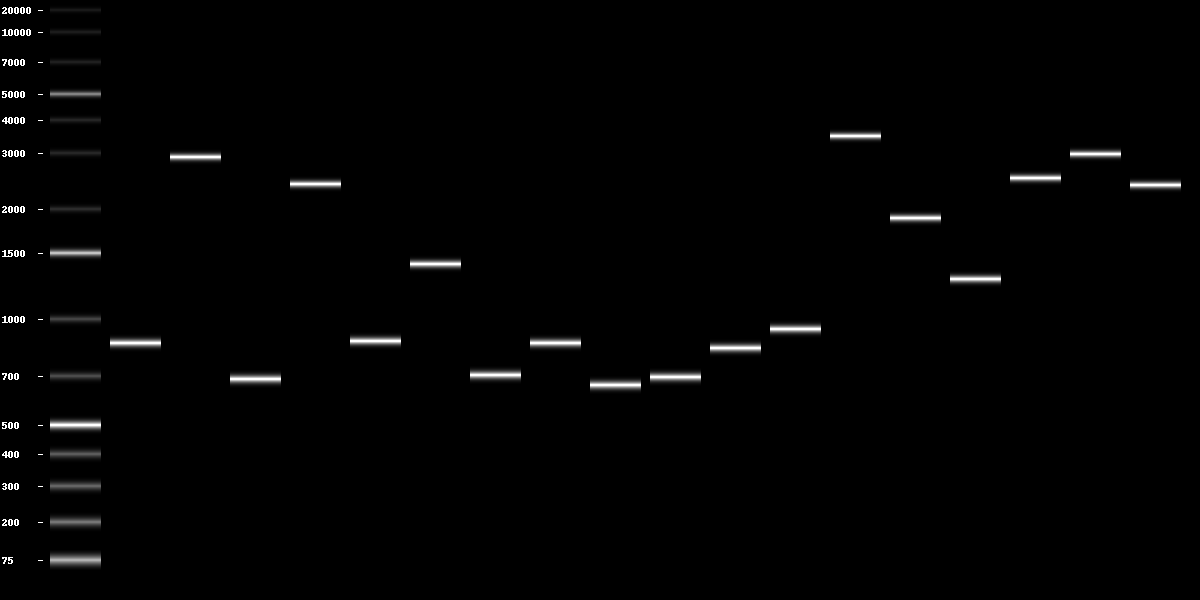

In [45]:
import pydna.gel
bands = list_of_amplicons
for band in bands:
    print(band.name)
pydna.gel.gel([pydna.ladders.GeneRuler_1kb_plus,*[[band] for band in bands]])

## First gel

LLPMBPKK_02635_amplicon
LLPMBPKK_07531_amplicon


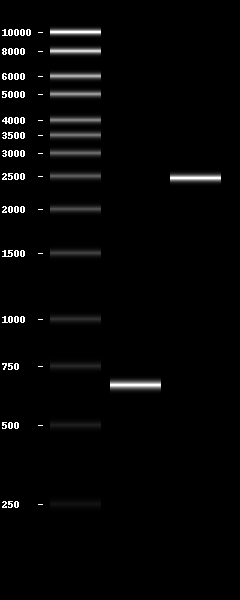

In [46]:
list_of_sub_amplicons = ['LLPMBPKK_02635_amplicon', 'LLPMBPKK_07531_amplicon']
gel_amplicons = [amplicon for amplicon in list_of_amplicons if str(amplicon.name) in list_of_sub_amplicons]

import pydna.gel
bands = gel_amplicons
for band in bands:
    print(band.name)
pydna.gel.gel([pydna.ladders.GeneRuler_1kb,*[[band] for band in bands]])

## Second gel

LLPMBPKK_00328_amplicon
LLPMBPKK_01488_amplicon
LLPMBPKK_02563_amplicon
LLPMBPKK_02637_amplicon
LLPMBPKK_05992_amplicon
LLPMBPKK_06907_amplicon


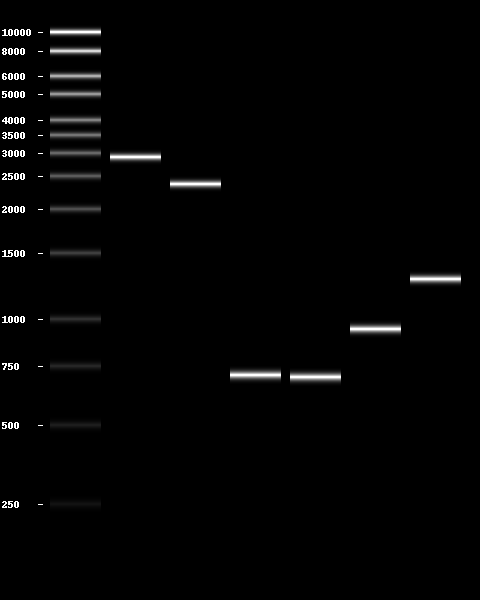

In [47]:
list_of_sub_amplicons = [
'LLPMBPKK_00328_amplicon',
'LLPMBPKK_02563_amplicon',
'LLPMBPKK_02637_amplicon',
'LLPMBPKK_05992_amplicon',
'LLPMBPKK_01488_amplicon',
'LLPMBPKK_06907_amplicon']
gel_amplicons = [amplicon for amplicon in list_of_amplicons if str(amplicon.name) in list_of_sub_amplicons]

import pydna.gel
bands = gel_amplicons
for band in bands:
    print(band.name)
pydna.gel.gel([pydna.ladders.GeneRuler_1kb,*[[band] for band in bands]])

## Third gel

LLPMBPKK_02563_amplicon
LLPMBPKK_02637_amplicon
LLPMBPKK_05992_amplicon


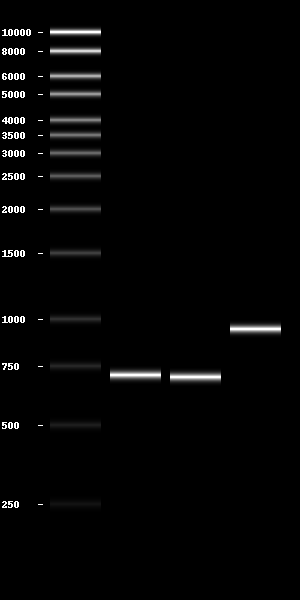

In [48]:
list_of_sub_amplicons = [
'LLPMBPKK_02563_amplicon',
'LLPMBPKK_02637_amplicon',
'LLPMBPKK_05992_amplicon']
gel_amplicons = [amplicon for amplicon in list_of_amplicons if str(amplicon.name) in list_of_sub_amplicons]

import pydna.gel
bands = gel_amplicons
for band in bands:
    print(band.name)
pydna.gel.gel([pydna.ladders.GeneRuler_1kb,*[[band] for band in bands]])

## Fourth gel

LLPMBPKK_00292_amplicon 863
LLPMBPKK_07744_amplicon 2966
LLPMBPKK_00586_amplicon 686
LLPMBPKK_02197_amplicon 872
LLPMBPKK_02633_amplicon 863
LLPMBPKK_02662_amplicon 836
LLPMBPKK_06422_amplicon 1880
LLPMBPKK_07949_amplicon 2354
LLPMBPKK_02209_amplicon 1403
LLPMBPKK_06337_amplicon 3470


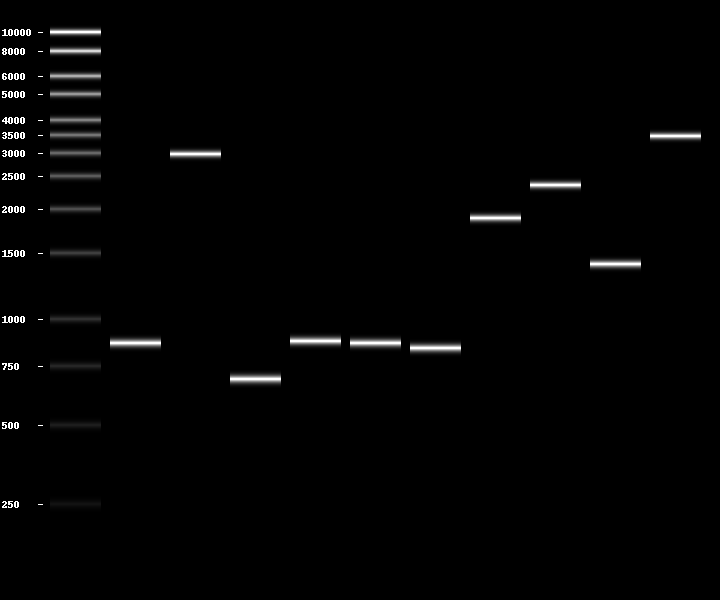

In [49]:
list_of_sub_amplicons = [
'LLPMBPKK_00292_amplicon',
'LLPMBPKK_07744_amplicon',
'LLPMBPKK_00586_amplicon',
'LLPMBPKK_02197_amplicon',
'LLPMBPKK_02633_amplicon',
'LLPMBPKK_02662_amplicon',
'LLPMBPKK_06422_amplicon',
'LLPMBPKK_07949_amplicon',
'LLPMBPKK_02209_amplicon',
'LLPMBPKK_06337_amplicon',]

gel_amplicons = []

for name in list_of_sub_amplicons: 
    for amplicon in list_of_amplicons: 
        if amplicon.name == name: 
            gel_amplicons.append(amplicon)

#gel_amplicons = [amplicon for amplicon in list_of_amplicons if str(amplicon.name) in list_of_sub_amplicons]


import pydna.gel
bands = gel_amplicons
for band in bands:
    print(band.name, len(band))
pydna.gel.gel([pydna.ladders.GeneRuler_1kb,*[[band] for band in bands]])

LLPMBPKK_00292_amplicon
LLPMBPKK_07744_amplicon
LLPMBPKK_00586_amplicon
LLPMBPKK_06337_amplicon


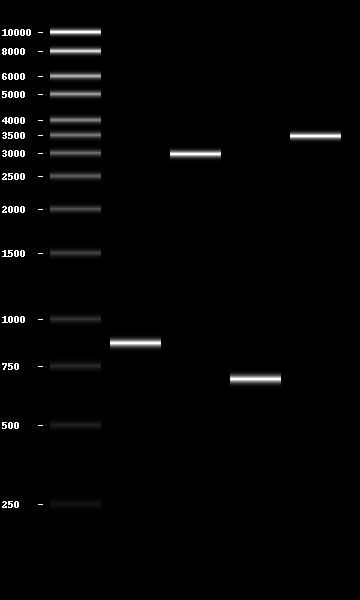

In [50]:
list_of_sub_amplicons = [
'LLPMBPKK_00292_amplicon',
'LLPMBPKK_07744_amplicon',
'LLPMBPKK_00586_amplicon',
'LLPMBPKK_06337_amplicon',]
gel_amplicons = []

for name in list_of_sub_amplicons: 
    for amplicon in list_of_amplicons: 
        if amplicon.name == name: 
            gel_amplicons.append(amplicon)

import pydna.gel
bands = gel_amplicons
for band in bands:
    print(band.name)
pydna.gel.gel([pydna.ladders.GeneRuler_1kb,*[[band] for band in bands]])

## Fourth gel

LLPMBPKK_00292_amplicon 863
LLPMBPKK_07744_amplicon 2966
LLPMBPKK_00586_amplicon 686
LLPMBPKK_02197_amplicon 872
LLPMBPKK_02633_amplicon 863
LLPMBPKK_02662_amplicon 836
LLPMBPKK_06422_amplicon 1880
LLPMBPKK_07949_amplicon 2354
LLPMBPKK_02209_amplicon 1403
LLPMBPKK_06337_amplicon 3470


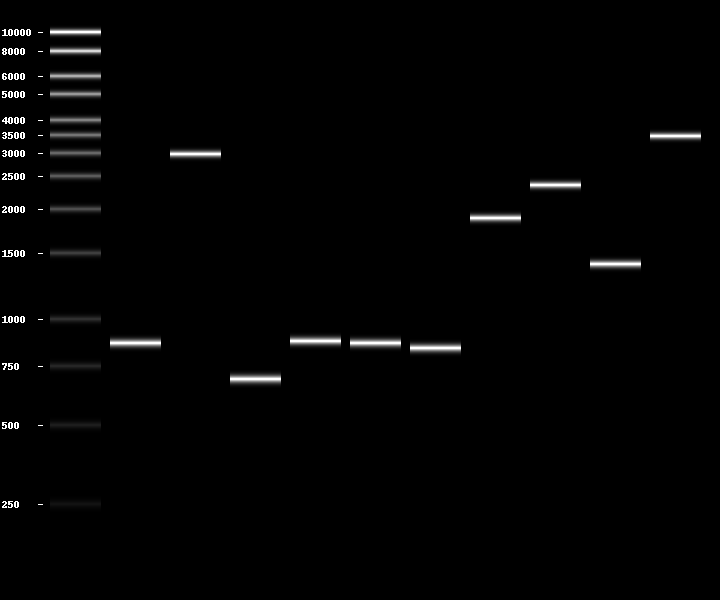

In [51]:
list_of_sub_amplicons = [
'LLPMBPKK_00292_amplicon',
'LLPMBPKK_07744_amplicon',
'LLPMBPKK_00586_amplicon',
'LLPMBPKK_02197_amplicon',
'LLPMBPKK_02633_amplicon',
'LLPMBPKK_02662_amplicon',
'LLPMBPKK_06422_amplicon',
'LLPMBPKK_07949_amplicon',
'LLPMBPKK_02209_amplicon',
'LLPMBPKK_06337_amplicon',]

gel_amplicons = []

for name in list_of_sub_amplicons: 
    for amplicon in list_of_amplicons: 
        if amplicon.name == name: 
            gel_amplicons.append(amplicon)

#gel_amplicons = [amplicon for amplicon in list_of_amplicons if str(amplicon.name) in list_of_sub_amplicons]


import pydna.gel
bands = gel_amplicons
for band in bands:
    print(band.name, len(band))
pydna.gel.gel([pydna.ladders.GeneRuler_1kb,*[[band] for band in bands]])

## colony pcr gel from streptomycestes

LLPMBPKK_00292_amplicon 863
LLPMBPKK_00328_amplicon 2909
LLPMBPKK_00586_amplicon 686
LLPMBPKK_01488_amplicon 2369
LLPMBPKK_02197_amplicon 872
LLPMBPKK_02563_amplicon 704
LLPMBPKK_02635_amplicon 659
LLPMBPKK_02662_amplicon 836
LLPMBPKK_05992_amplicon 938
LLPMBPKK_06422_amplicon 1880
LLPMBPKK_06907_amplicon 1271
LLPMBPKK_07531_amplicon 2471
LLPMBPKK_07949_amplicon 2354


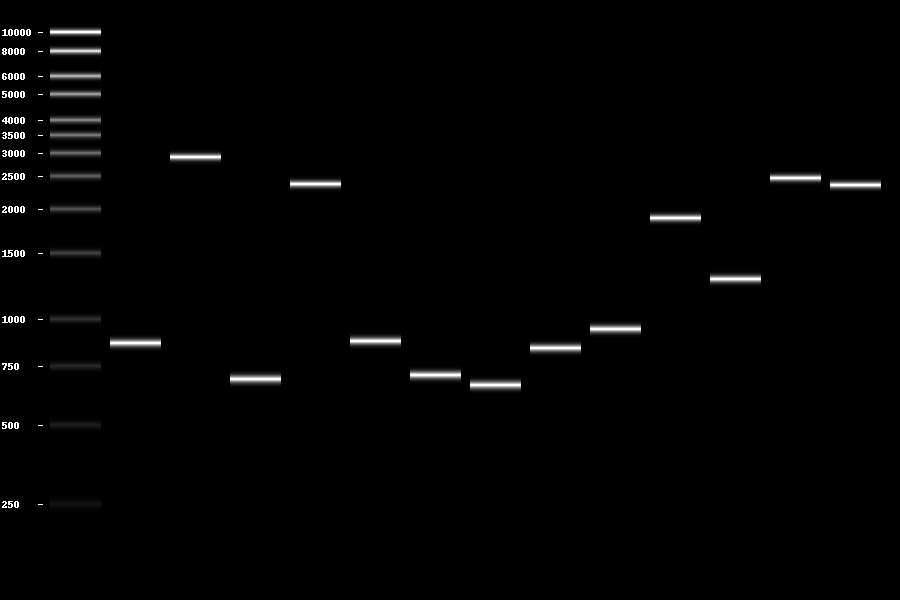

In [52]:
list_of_sub_amplicons = [
    "LLPMBPKK_00292_amplicon",
    "LLPMBPKK_00328_amplicon",
    "LLPMBPKK_00586_amplicon",
    "LLPMBPKK_01488_amplicon",
    "LLPMBPKK_02197_amplicon",
    "LLPMBPKK_02563_amplicon",
    "LLPMBPKK_02635_amplicon",
    "LLPMBPKK_02662_amplicon",
    "LLPMBPKK_05992_amplicon",
    "LLPMBPKK_06422_amplicon",
    "LLPMBPKK_06907_amplicon",
    "LLPMBPKK_07531_amplicon",
    "LLPMBPKK_07949_amplicon"
]


gel_amplicons = []

for name in list_of_sub_amplicons: 
    for amplicon in list_of_amplicons: 
        if amplicon.name == name: 
            gel_amplicons.append(amplicon)

#gel_amplicons = [amplicon for amplicon in list_of_amplicons if str(amplicon.name) in list_of_sub_amplicons]


import pydna.gel
bands = gel_amplicons
for band in bands:
    print(band.name, len(band))
pydna.gel.gel([pydna.ladders.GeneRuler_1kb,*[[band] for band in bands]])

# Analyze how the amplicons assemble in the background plasmid



In [53]:
vector = read_genbank_files('data_for_tf_activation_project/plasmids/p270_prm4e-pkaso-rbs.gb')[0]

In [54]:
vector

SeqRecord(seq=Seq('AAAGGCGGTAATACGGTTATCCACAGAATCAGGGGATAACGCAGGAAAGAACAT...GGT'), id='p270_pRM4e-PkasO-RBS', name='p270_pRM4e-PkasO-RBS', description='synthetic circular DNA', dbxrefs=[])

In [55]:
from Bio.Restriction import StuI


In [56]:
digested_vector = Dseqrecord(vector, circular = True).cut(StuI)[0]

In [57]:
digested_vector

Dseqrecord(-5230)

In [58]:
list_of_assemblies = []
for regulator_part in list_of_amplicons:
    all_parts = tuple([digested_vector] + [regulator_part] )
    list_of_assemblies.append(all_parts)

In [59]:
list_of_assemblies

[(Dseqrecord(-5230), Amplicon(863)),
 (Dseqrecord(-5230), Amplicon(2909)),
 (Dseqrecord(-5230), Amplicon(686)),
 (Dseqrecord(-5230), Amplicon(2369)),
 (Dseqrecord(-5230), Amplicon(872)),
 (Dseqrecord(-5230), Amplicon(1403)),
 (Dseqrecord(-5230), Amplicon(704)),
 (Dseqrecord(-5230), Amplicon(863)),
 (Dseqrecord(-5230), Amplicon(659)),
 (Dseqrecord(-5230), Amplicon(698)),
 (Dseqrecord(-5230), Amplicon(836)),
 (Dseqrecord(-5230), Amplicon(938)),
 (Dseqrecord(-5230), Amplicon(3470)),
 (Dseqrecord(-5230), Amplicon(1880)),
 (Dseqrecord(-5230), Amplicon(1271)),
 (Dseqrecord(-5230), Amplicon(2471)),
 (Dseqrecord(-5230), Amplicon(2966)),
 (Dseqrecord(-5230), Amplicon(2354))]

In [60]:
from pydna.assembly import Assembly

assembled_plasmids = []
# assemble vector
for vector in list_of_assemblies:
    assemblyobj = Assembly(vector,  limit=25)
    assembled_plasmids.append(assemblyobj)

In [61]:
MY_final_assembled_plasmids =[]
# Process and name the assembled plasmids
for i, assemblyobj in enumerate(assembled_plasmids):
    # Perform assembly circular
    assembly_result = assemblyobj.assemble_circular()[0]

    # Print the figure of the assembled plasmid
    print(assembly_result.figure())

    # Create a Dseqrecord and append to the final list
    my_plasmid = Dseqrecord(assembly_result, circular=True)
    my_plasmid.name = f'p{i+1}_PkasO-RBS_{list_of_amplicons[i].name[:14]}'
    my_plasmid.id = f'p{i+1}_{list_of_amplicons[i].name[:14]}'

    MY_final_assembled_plasmids.append(my_plasmid)


 -|name|25
|       \/
|       /\
|       25|LLPMBPKK_00292_amplicon|25
|                                  \/
|                                  /\
|                                  25-
|                                     |
 -------------------------------------
 -|name|25
|       \/
|       /\
|       25|LLPMBPKK_00328_amplicon|25
|                                  \/
|                                  /\
|                                  25-
|                                     |
 -------------------------------------
 -|name|25
|       \/
|       /\
|       25|LLPMBPKK_00586_amplicon|25
|                                  \/
|                                  /\
|                                  25-
|                                     |
 -------------------------------------
 -|name|25
|       \/
|       /\
|       25|LLPMBPKK_01488_amplicon|25
|                                  \/
|                                  /\
|                                  25-
|                  

In [62]:
# from pydna.assembly import Assembly

# assembled_plasmids = []
# # assemble vector
# for vector in list_of_assemblies:
#     assemblyobj = Assembly(vector,  limit=25)
#     assembled_plasmids.append(assemblyobj)

# MY_final_assembled_plasmids = []
# # Print the assembled plasmids
# for i in range(len(assembled_plasmids)): 
#     print(assembled_plasmids[i].assemble_circular()[0].figure())

#     MY_final_assembled_plasmids.append(Dseqrecord(assembled_plasmids[i].assemble_circular()[0], circular=True, name= f'pLL{i+1}_PkasO-RBS_{list_of_amplicons[i].name[:14]}', id=f'pLL{i+1}_{list_of_amplicons[i].name[:14]}'))
                                                    


In [63]:
MY_final_assembled_plasmids[0].name

'p1_PkasO-RBS_LLPMBPKK_00292'

In [64]:
MY_final_assembled_plasmids

[Dseqrecord(o6043),
 Dseqrecord(o8089),
 Dseqrecord(o5866),
 Dseqrecord(o7549),
 Dseqrecord(o6052),
 Dseqrecord(o6583),
 Dseqrecord(o5884),
 Dseqrecord(o6043),
 Dseqrecord(o5839),
 Dseqrecord(o5878),
 Dseqrecord(o6016),
 Dseqrecord(o6118),
 Dseqrecord(o8650),
 Dseqrecord(o7060),
 Dseqrecord(o6451),
 Dseqrecord(o7651),
 Dseqrecord(o8146),
 Dseqrecord(o7534)]

In [65]:
MY_final_assembled_plasmids[0].id

'p1_LLPMBPKK_00292'

Save the plasmids^

In [66]:
save_plasmids = False

In [67]:
if save_plasmids: 
    for vector in MY_final_assembled_plasmids: 
        vector.write(f"data_for_tf_activation_project/plasmids/{vector.name}.gb") 

In [68]:
MY_final_assembled_plasmids[0].name

'p1_PkasO-RBS_LLPMBPKK_00292'

In [69]:
MY_final_assembled_plasmids[0]

Dseqrecord(o6043)

In [70]:
MY_final_assembled_plasmids[0].write(f"data_for_tf_activation_project/plasmids/prøve_plasmid.gb") 

ValueError: No sequences found in data:
(data_for_tf_activation_project/plasmids/prøve_plasmid.gb)

# first try 
LLPMBPKK_02635
66-64-60
40 sec/kb
659 bp

LLPMBPKK_07531
66-64-60
40 sec/kb
2471 bp


In [ ]:

elon1 = (659/1000)*40
elon2 = (2471/1000)*40 

print(f'First elongation : {elon1}')
print(f'Second elongation : {elon2}')

First elongation : 26.36
Second elongation : 98.84


## Calculating all volumes from concentrations

In [ ]:
df_nano_drop = pd.read_csv('../tf_activation_study/lucas_gelextractionsof_17_FRAGMENTS_13_12_2023 copy.csv', sep=';')
df_nano_drop.head()

FileNotFoundError: [Errno 2] No such file or directory: '../tf_activation_study/lucas_gelextractionsof_17_FRAGMENTS_13_12_2023 copy.csv'

In [ ]:
length_of_amplicons = [len(amplicon) for amplicon in amplicons]
name_of_amplicons = [amplicon.id for amplicon in amplicons]
concentrations_of_amplicons = [concentration/10 for concentration in list(df_nano_drop['Nucleic Acid'])]

del length_of_amplicons[12] 
del name_of_amplicons[12] 

name_of_amplicons

['LLPMBPKK_00292',
 'LLPMBPKK_00328',
 'LLPMBPKK_00586',
 'LLPMBPKK_01488',
 'LLPMBPKK_02197',
 'LLPMBPKK_02209',
 'LLPMBPKK_02563',
 'LLPMBPKK_02633',
 'LLPMBPKK_02635',
 'LLPMBPKK_02637',
 'LLPMBPKK_02662',
 'LLPMBPKK_05992',
 'LLPMBPKK_06422',
 'LLPMBPKK_06907',
 'LLPMBPKK_07531',
 'LLPMBPKK_07744',
 'LLPMBPKK_07949']

In [ ]:
concentrations_of_amplicons

[19.4,
 69.4,
 73.5,
 7.4,
 58.0,
 59.1,
 63.9,
 28.4,
 65.4,
 88.6,
 44.3,
 22.4,
 67.7,
 26.6,
 27.6,
 12.0,
 24.1]

In [ ]:

# Example data for Insert 2
insert_concentrations = concentrations_of_amplicons
insert_lengths = length_of_amplicons
plasmid_concentration = 33.3  # Concentration of Insert 1 (the plasmid)
plasmid_length = 5230  # This can be any value, as it's not used in the calculation
equimolar_mass_of_plasmid_ng = 45


def calculate_ligation_volumes_with_h2o(insert_concentrations, insert_lengths,
                                        plasmid_concentration, plasmid_length,
                                        equimolar_mass_of_plasmid_ng, h2o_volume=2.5, 
                                        ration_of_plasmid_to_insert = 3):
    # Create a DataFrame to store the results
    df = pd.DataFrame({'Insert Length (bp)': insert_lengths,
                       'Insert Concentration (ng/µL)': insert_concentrations})

    # Calculate required mass of each insert
    df['Required Mass of Insert (ng)'] = round(equimolar_mass_of_plasmid_ng * (df['Insert Length (bp)'] / plasmid_length)*ration_of_plasmid_to_insert, 2)

    # Calculate volume of each insert to add (in µL)
    df['Volume of Insert to Add (µL)'] = round(df['Required Mass of Insert (ng)'] / df['Insert Concentration (ng/µL)'], 2)

    # Calculate the volume of the plasmid to add to be equimolar (in µL)
    df['Volume of Plasmid to Add (µL)'] = round(equimolar_mass_of_plasmid_ng / plasmid_concentration, 2)

    # Calculate and add the total volume column
    df['Total Volume to Add (µL)'] = round(df['Volume of Insert to Add (µL)'] + df['Volume of Plasmid to Add (µL)'], 2)

    # Add a column for the volume of H2O to add, which is the difference between the total volume and the specified H2O volume
    df['Volume of H2O to Add (µL)'] = round(h2o_volume - df['Total Volume to Add (µL)'],2)
    print(f'Equimolar_mass_of_plasmid_ng : {equimolar_mass_of_plasmid_ng}')

    return df

# Example Usage with an equimolar mass of the plasmid and specified H2O volume
h2o_volume = 2.5  # µL

# Calculate the volumes with the specified equimolar mass and H2O volume
ligation_volumes_df_with_h2o = calculate_ligation_volumes_with_h2o(
    insert_concentrations, insert_lengths, plasmid_concentration, plasmid_length, equimolar_mass_of_plasmid_ng, h2o_volume)

# insert names column
ligation_volumes_df_with_h2o.insert(loc = 0,
          column = 'Names',
          value = name_of_amplicons)
ligation_volumes_df_with_h2o.to_clipboard()


Equimolar_mass_of_plasmid_ng : 45


In [ ]:
ligation_volumes_df_with_h2o

,Names,Insert Length (bp),Insert Concentration (ng/µL),Required Mass of Insert (ng),Volume of Insert to Add (µL),Volume of Plasmid to Add (µL),Total Volume to Add (µL),Volume of H2O to Add (µL)
0,LLPMBPKK_00292,813,19.4,20.99,1.08,1.35,2.43,0.07
1,LLPMBPKK_00328,2859,69.4,73.80,1.06,1.35,2.41,0.09
2,LLPMBPKK_00586,636,73.5,16.42,0.22,1.35,1.57,0.93
3,LLPMBPKK_01488,2319,7.4,59.86,8.09,1.35,9.44,-6.94
4,LLPMBPKK_02197,822,58.0,21.22,0.37,1.35,1.72,0.78
5,LLPMBPKK_02209,1353,59.1,34.92,0.59,1.35,1.94,0.56
6,LLPMBPKK_02563,654,63.9,16.88,0.26,1.35,1.61,0.89
7,LLPMBPKK_02633,813,28.4,20.99,0.74,1.35,2.09,0.41
8,LLPMBPKK_02635,609,65.4,15.72,0.24,1.35,1.59,0.91
9,LLPMBPKK_02637,648,88.6,16.73,0.19,1.35,1.54,0.96


## Run colony PCR analysis

- Same primers will be used for PCR analysis
- Different elongation times 
- we can use our grouping method

In [ ]:

def group_amplicons(amplicon_data, length_threshold, melting_temp_threshold):
    amplicons = amplicon_data['amplicons']
    melting_temps = amplicon_data['melting_temperatures']
    grouped = []
    used_indices = set()

    for i, amplicon in enumerate(amplicons):
        if i in used_indices:
            continue

        current_group = [amplicon]
        used_indices.add(i)

        for j in range(i + 1, len(amplicons)):
            if j not in used_indices:
                length_diff = abs(len(amplicon) - len(amplicons[j]))
                melting_temp_diff = abs(melting_temps[i] - melting_temps[j])

                if length_diff <= length_threshold and melting_temp_diff <= melting_temp_threshold:
                    current_group.append(amplicons[j])
                    used_indices.add(j)

        grouped.append(current_group)

    return grouped

# Group the amplicons with a threshold (e.g., 100)
grouped_amplicons = group_amplicons(amplicon_dict, 500, 10)


import pandas as pd

def create_combined_dataframe(grouped_amplicons, amplicon_dict):
    data = {'Group': [], 'Name': [], 'Length': [], 'Melting Temperature 1': [], 'Melting Temperature 2': [], 'Melting Temperature 3': []}

    for group_number, group in enumerate(grouped_amplicons):
        for amplicon in group:
            index = amplicon_dict['amplicons'].index(amplicon)
            melting_temp1 = amplicon_dict['melting_temperatures'][index]
            melting_temp2 = melting_temp1 - 2
            melting_temp3 = melting_temp1 - 6

            data['Group'].append(group_number)
            data['Name'].append(amplicon.name)
            data['Length'].append(len(amplicon))
            data['Melting Temperature 1'].append(melting_temp1)
            data['Melting Temperature 2'].append(melting_temp2)
            data['Melting Temperature 3'].append(melting_temp3)

    combined_df = pd.DataFrame(data)
    return combined_df

# Example use
combined_amplicons_df = create_combined_dataframe(grouped_amplicons, amplicon_dict)

combined_amplicons_df = combined_amplicons_df.sort_values(by='Name').reset_index()

combined_amplicons_df['index'] = [index+1  for index in list(combined_amplicons_df.index)]
combined_amplicons_df = combined_amplicons_df.sort_values(by='Group')

combined_amplicons_df.to_clipboard()
combined_amplicons_df


,index,Group,Name,Length,Melting Temperature 1,Melting Temperature 2,Melting Temperature 3
0,1,0,LLPMBPKK_00292_amplicon,863,71,69,65
14,15,0,LLPMBPKK_06907_amplicon,1271,66,64,60
11,12,0,LLPMBPKK_05992_amplicon,938,68,66,62
10,11,0,LLPMBPKK_02662_amplicon,836,67,65,61
9,10,0,LLPMBPKK_02637_amplicon,698,68,66,62
7,8,0,LLPMBPKK_02633_amplicon,863,67,65,61
8,9,0,LLPMBPKK_02635_amplicon,659,66,64,60
4,5,0,LLPMBPKK_02197_amplicon,872,67,65,61
2,3,0,LLPMBPKK_00586_amplicon,686,66,64,60
6,7,0,LLPMBPKK_02563_amplicon,704,67,65,61


In [ ]:
index_number = [1,3, 5,7,8, 9, 10 ]

In [ ]:
combined_amplicons_df.to_clipboard()

## Gel images of the colony pcrs

In [ ]:
# first resort it by index
combined_amplicons_df_index_sort = combined_amplicons_df.sort_values(by='index')
combined_amplicons_df_index_sort = combined_amplicons_df_index_sort.drop(index=(12))

combined_amplicons_df_index_sort

,index,Group,Name,Length,Melting Temperature 1,Melting Temperature 2,Melting Temperature 3
0,1,0,LLPMBPKK_00292_amplicon,863,71,69,65
1,2,1,LLPMBPKK_00328_amplicon,2909,68,66,62
2,3,0,LLPMBPKK_00586_amplicon,686,66,64,60
3,4,2,LLPMBPKK_01488_amplicon,2369,70,68,64
4,5,0,LLPMBPKK_02197_amplicon,872,67,65,61
5,6,3,LLPMBPKK_02209_amplicon,1403,66,64,60
6,7,0,LLPMBPKK_02563_amplicon,704,67,65,61
7,8,0,LLPMBPKK_02633_amplicon,863,67,65,61
8,9,0,LLPMBPKK_02635_amplicon,659,66,64,60
9,10,0,LLPMBPKK_02637_amplicon,698,68,66,62


[Amplicon(863), Amplicon(863), Amplicon(863), Amplicon(863), Amplicon(863), Amplicon(863), Amplicon(2909), Amplicon(2909), Amplicon(2909), Amplicon(2909), Amplicon(2909), Amplicon(2909), Amplicon(686), Amplicon(686), Amplicon(686), Amplicon(686), Amplicon(686), Amplicon(686)]
LLPMBPKK_00292_amplicon 863
LLPMBPKK_00292_amplicon 863
LLPMBPKK_00292_amplicon 863
LLPMBPKK_00292_amplicon 863
LLPMBPKK_00292_amplicon 863
LLPMBPKK_00292_amplicon 863
LLPMBPKK_00328_amplicon 2909
LLPMBPKK_00328_amplicon 2909
LLPMBPKK_00328_amplicon 2909
LLPMBPKK_00328_amplicon 2909
LLPMBPKK_00328_amplicon 2909
LLPMBPKK_00328_amplicon 2909
LLPMBPKK_00586_amplicon 686
LLPMBPKK_00586_amplicon 686
LLPMBPKK_00586_amplicon 686
LLPMBPKK_00586_amplicon 686
LLPMBPKK_00586_amplicon 686
LLPMBPKK_00586_amplicon 686


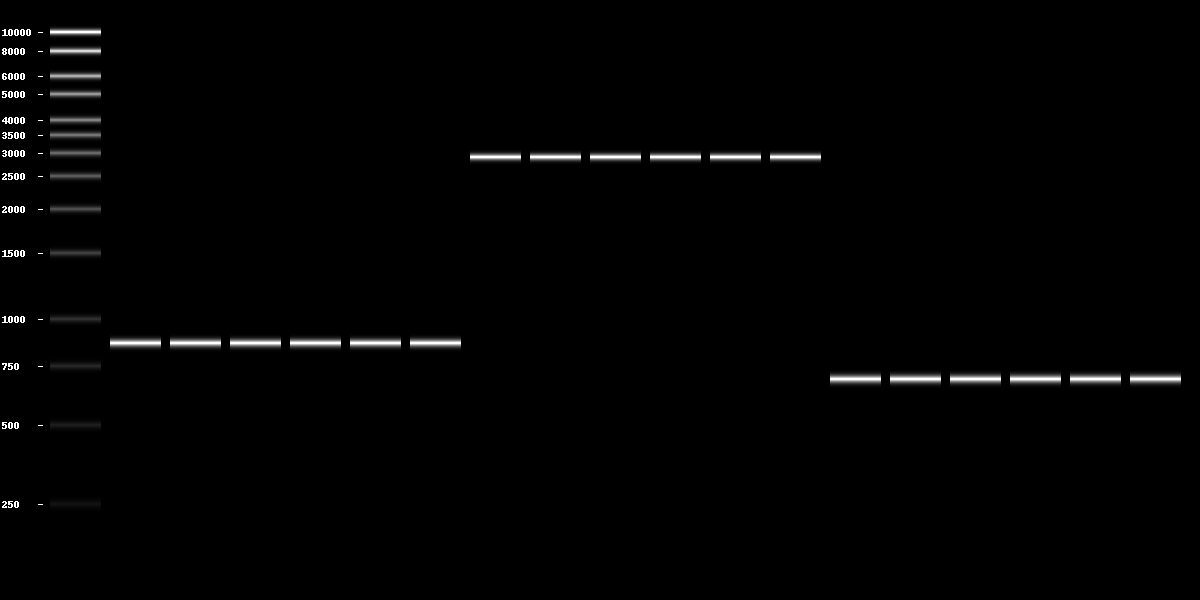

In [ ]:
list_of_sub_amplicons = list(combined_amplicons_df_index_sort['Name'])[:3]

gel_amplicons = []

for name in list_of_sub_amplicons: 
    for amplicon in list_of_amplicons: 
        if amplicon.name == name: 
            gel_amplicons.append(amplicon)

gel_amplicons = [[amplicon]*6 for amplicon in gel_amplicons] #if str(amplicon.name) in list_of_sub_amplicons]
flattened_amplicons_comp = [amplicon for sublist in gel_amplicons for amplicon in sublist]

print(flattened_amplicons_comp)


import pydna.gel
bands = flattened_amplicons_comp
for band in bands:
    print(band.name, len(band))
pydna.gel.gel([pydna.ladders.GeneRuler_1kb,*[[band] for band in bands]])

[Amplicon(2369), Amplicon(2369), Amplicon(2369), Amplicon(2369), Amplicon(2369), Amplicon(2369), Amplicon(872), Amplicon(872), Amplicon(872), Amplicon(872), Amplicon(872), Amplicon(872), Amplicon(1403), Amplicon(1403), Amplicon(1403), Amplicon(1403), Amplicon(1403), Amplicon(1403), Amplicon(704), Amplicon(704), Amplicon(704), Amplicon(704), Amplicon(704), Amplicon(704)]
LLPMBPKK_01488_amplicon 2369
LLPMBPKK_01488_amplicon 2369
LLPMBPKK_01488_amplicon 2369
LLPMBPKK_01488_amplicon 2369
LLPMBPKK_01488_amplicon 2369
LLPMBPKK_01488_amplicon 2369
LLPMBPKK_02197_amplicon 872
LLPMBPKK_02197_amplicon 872
LLPMBPKK_02197_amplicon 872
LLPMBPKK_02197_amplicon 872
LLPMBPKK_02197_amplicon 872
LLPMBPKK_02197_amplicon 872
LLPMBPKK_02209_amplicon 1403
LLPMBPKK_02209_amplicon 1403
LLPMBPKK_02209_amplicon 1403
LLPMBPKK_02209_amplicon 1403
LLPMBPKK_02209_amplicon 1403
LLPMBPKK_02209_amplicon 1403
LLPMBPKK_02563_amplicon 704
LLPMBPKK_02563_amplicon 704
LLPMBPKK_02563_amplicon 704
LLPMBPKK_02563_amplicon 704

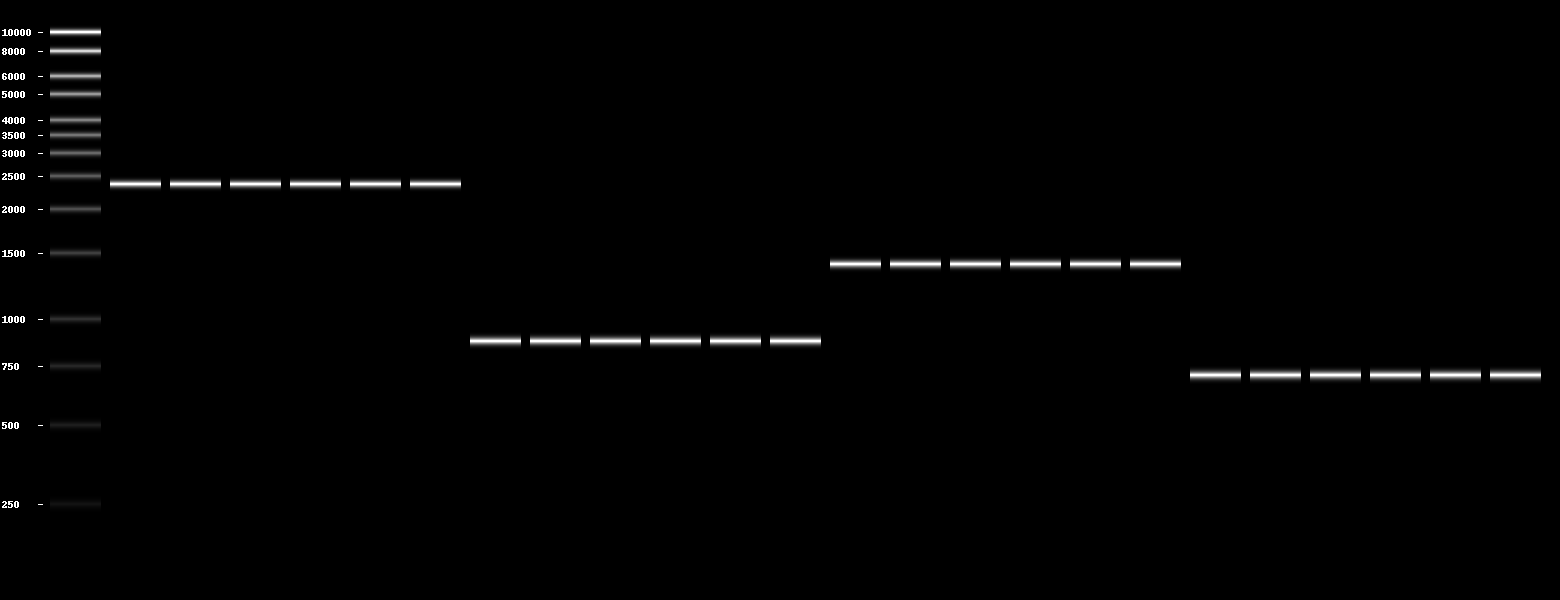

In [ ]:
list_of_sub_amplicons = list(combined_amplicons_df_index_sort['Name'])[3:7]

gel_amplicons = []

for name in list_of_sub_amplicons: 
    for amplicon in list_of_amplicons: 
        if amplicon.name == name: 
            gel_amplicons.append(amplicon)

gel_amplicons = [[amplicon]*6 for amplicon in gel_amplicons] #if str(amplicon.name) in list_of_sub_amplicons]
flattened_amplicons_comp = [amplicon for sublist in gel_amplicons for amplicon in sublist]

print(flattened_amplicons_comp)


import pydna.gel
bands = flattened_amplicons_comp
for band in bands:
    print(band.name, len(band))
pydna.gel.gel([pydna.ladders.GeneRuler_1kb,*[[band] for band in bands]])

[Amplicon(863), Amplicon(863), Amplicon(863), Amplicon(863), Amplicon(863), Amplicon(863), Amplicon(659), Amplicon(659), Amplicon(659), Amplicon(659), Amplicon(659), Amplicon(659), Amplicon(698), Amplicon(698), Amplicon(698), Amplicon(698), Amplicon(698), Amplicon(698), Amplicon(836), Amplicon(836), Amplicon(836), Amplicon(836), Amplicon(836), Amplicon(836)]
LLPMBPKK_02633_amplicon 863
LLPMBPKK_02633_amplicon 863
LLPMBPKK_02633_amplicon 863
LLPMBPKK_02633_amplicon 863
LLPMBPKK_02633_amplicon 863
LLPMBPKK_02633_amplicon 863
LLPMBPKK_02635_amplicon 659
LLPMBPKK_02635_amplicon 659
LLPMBPKK_02635_amplicon 659
LLPMBPKK_02635_amplicon 659
LLPMBPKK_02635_amplicon 659
LLPMBPKK_02635_amplicon 659
LLPMBPKK_02637_amplicon 698
LLPMBPKK_02637_amplicon 698
LLPMBPKK_02637_amplicon 698
LLPMBPKK_02637_amplicon 698
LLPMBPKK_02637_amplicon 698
LLPMBPKK_02637_amplicon 698
LLPMBPKK_02662_amplicon 836
LLPMBPKK_02662_amplicon 836
LLPMBPKK_02662_amplicon 836
LLPMBPKK_02662_amplicon 836
LLPMBPKK_02662_amplicon

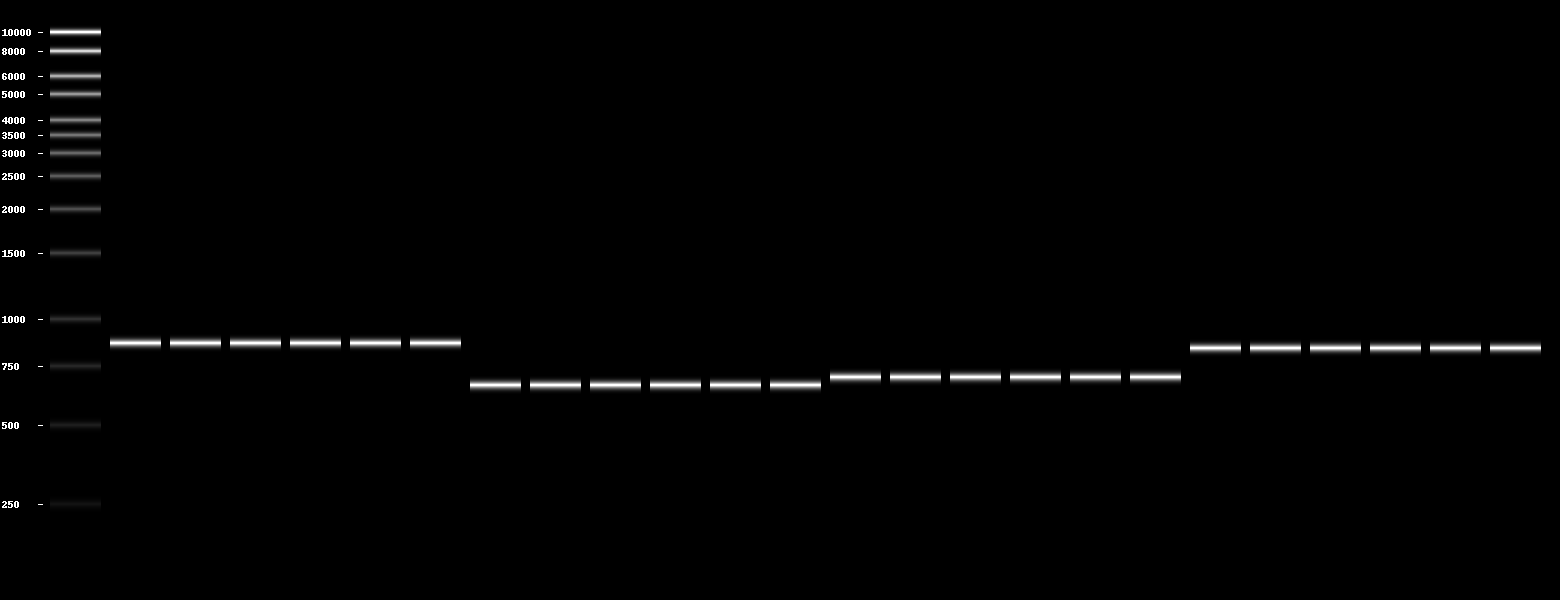

In [ ]:
list_of_sub_amplicons = list(combined_amplicons_df_index_sort['Name'])[7:11]

gel_amplicons = []

for name in list_of_sub_amplicons: 
    for amplicon in list_of_amplicons: 
        if amplicon.name == name: 
            gel_amplicons.append(amplicon)

gel_amplicons = [[amplicon]*6 for amplicon in gel_amplicons] #if str(amplicon.name) in list_of_sub_amplicons]
flattened_amplicons_comp = [amplicon for sublist in gel_amplicons for amplicon in sublist]

print(flattened_amplicons_comp)


import pydna.gel
bands = flattened_amplicons_comp
for band in bands:
    print(band.name, len(band))
pydna.gel.gel([pydna.ladders.GeneRuler_1kb,*[[band] for band in bands]])

[Amplicon(938), Amplicon(938), Amplicon(938), Amplicon(938), Amplicon(938), Amplicon(938), Amplicon(1880), Amplicon(1880), Amplicon(1880), Amplicon(1880), Amplicon(1880), Amplicon(1880), Amplicon(1271), Amplicon(1271), Amplicon(1271), Amplicon(1271), Amplicon(1271), Amplicon(1271), Amplicon(2471), Amplicon(2471), Amplicon(2471), Amplicon(2471), Amplicon(2471), Amplicon(2471)]
LLPMBPKK_05992_amplicon 938
LLPMBPKK_05992_amplicon 938
LLPMBPKK_05992_amplicon 938
LLPMBPKK_05992_amplicon 938
LLPMBPKK_05992_amplicon 938
LLPMBPKK_05992_amplicon 938
LLPMBPKK_06422_amplicon 1880
LLPMBPKK_06422_amplicon 1880
LLPMBPKK_06422_amplicon 1880
LLPMBPKK_06422_amplicon 1880
LLPMBPKK_06422_amplicon 1880
LLPMBPKK_06422_amplicon 1880
LLPMBPKK_06907_amplicon 1271
LLPMBPKK_06907_amplicon 1271
LLPMBPKK_06907_amplicon 1271
LLPMBPKK_06907_amplicon 1271
LLPMBPKK_06907_amplicon 1271
LLPMBPKK_06907_amplicon 1271
LLPMBPKK_07531_amplicon 2471
LLPMBPKK_07531_amplicon 2471
LLPMBPKK_07531_amplicon 2471
LLPMBPKK_07531_amp

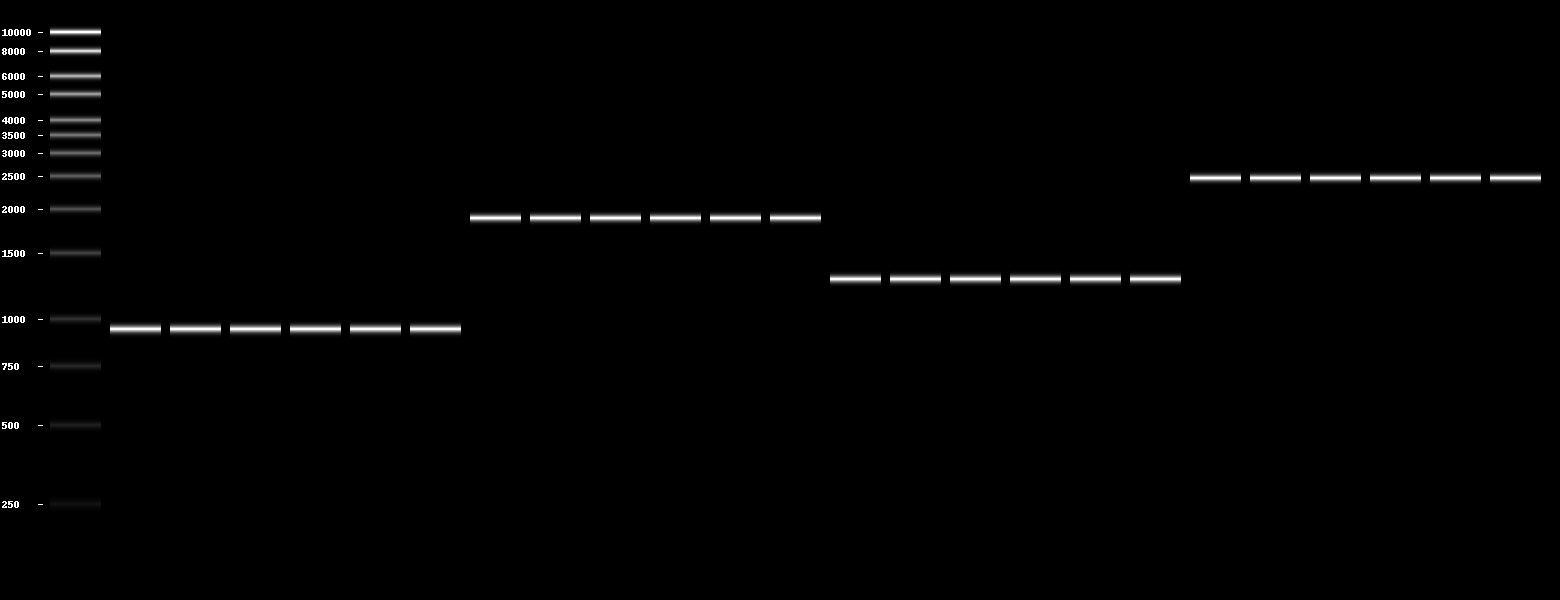

In [ ]:
list_of_sub_amplicons = list(combined_amplicons_df_index_sort['Name'])[11:15]

gel_amplicons = []

for name in list_of_sub_amplicons: 
    for amplicon in list_of_amplicons: 
        if amplicon.name == name: 
            gel_amplicons.append(amplicon)

gel_amplicons = [[amplicon]*6 for amplicon in gel_amplicons] #if str(amplicon.name) in list_of_sub_amplicons]
flattened_amplicons_comp = [amplicon for sublist in gel_amplicons for amplicon in sublist]

print(flattened_amplicons_comp)


import pydna.gel
bands = flattened_amplicons_comp
for band in bands:
    print(band.name, len(band))
pydna.gel.gel([pydna.ladders.GeneRuler_1kb,*[[band] for band in bands]])

[Amplicon(2966), Amplicon(2966), Amplicon(2966), Amplicon(2966), Amplicon(2966), Amplicon(2966), Amplicon(2354), Amplicon(2354), Amplicon(2354), Amplicon(2354), Amplicon(2354), Amplicon(2354)]
LLPMBPKK_07744_amplicon 2966
LLPMBPKK_07744_amplicon 2966
LLPMBPKK_07744_amplicon 2966
LLPMBPKK_07744_amplicon 2966
LLPMBPKK_07744_amplicon 2966
LLPMBPKK_07744_amplicon 2966
LLPMBPKK_07949_amplicon 2354
LLPMBPKK_07949_amplicon 2354
LLPMBPKK_07949_amplicon 2354
LLPMBPKK_07949_amplicon 2354
LLPMBPKK_07949_amplicon 2354
LLPMBPKK_07949_amplicon 2354


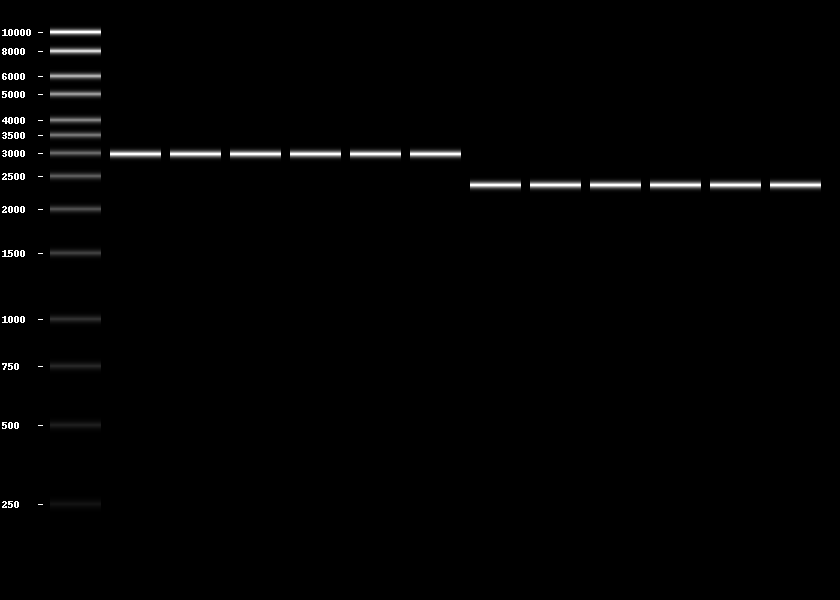

In [ ]:
list_of_sub_amplicons = list(combined_amplicons_df_index_sort['Name'])[15:19]

gel_amplicons = []

for name in list_of_sub_amplicons: 
    for amplicon in list_of_amplicons: 
        if amplicon.name == name: 
            gel_amplicons.append(amplicon)

gel_amplicons = [[amplicon]*6 for amplicon in gel_amplicons] #if str(amplicon.name) in list_of_sub_amplicons]
flattened_amplicons_comp = [amplicon for sublist in gel_amplicons for amplicon in sublist]

print(flattened_amplicons_comp)


import pydna.gel
bands = flattened_amplicons_comp
for band in bands:
    print(band.name, len(band))
pydna.gel.gel([pydna.ladders.GeneRuler_1kb,*[[band] for band in bands]])

In [ ]:
# 03.01.2023

In [ ]:
df_nano_drop1 = pd.read_csv('../tf_activation_study/lucas_purified_plasmids_from_diff_colonies_20122023.csv', sep=';')
df_nano_drop1

,#,Sample ID,User name,Date and Time,Nucleic Acid,Unit,A260 (Abs),A280 (Abs),260/280,260/230,Sample Type,Factor
0,182,Plasmid_purification20_12_2023,Lab User,20-12-2023 11:37:39,1305,ng/µl,2609,1401,186,189,DNA,5000
1,183,Plasmid_purification20_12_2023,Lab User,20-12-2023 11:38:08,1105,ng/µl,2211,1200,184,154,DNA,5000
2,184,Plasmid_purification20_12_2023,Lab User,20-12-2023 11:38:36,381,ng/µl,762,397,192,204,DNA,5000
3,185,Plasmid_purification20_12_2023,Lab User,20-12-2023 11:39:04,279,ng/µl,557,293,190,199,DNA,5000
4,186,Plasmid_purification20_12_2023,Lab User,20-12-2023 11:39:31,3208,ng/µl,6416,3447,186,213,DNA,5000
5,187,Plasmid_purification20_12_2023,Lab User,20-12-2023 11:39:56,736,ng/µl,1472,797,185,209,DNA,5000
6,188,Plasmid_purification20_12_2023,Lab User,20-12-2023 11:40:20,433,ng/µl,866,460,188,206,DNA,5000
7,189,Plasmid_purification20_12_2023,Lab User,20-12-2023 11:40:49,424,ng/µl,849,452,188,114,DNA,5000
8,190,Plasmid_purification20_12_2023,Lab User,20-12-2023 11:41:10,636,ng/µl,1272,684,186,209,DNA,5000
9,191,Plasmid_purification20_12_2023,Lab User,20-12-2023 11:41:30,534,ng/µl,1068,564,189,209,DNA,5000


In [ ]:
concentrations_of_amplicons1 = [concentration/10 for concentration in list(df_nano_drop1['Nucleic Acid'])]
concentrations_of_amplicons1

[130.5,
 110.5,
 38.1,
 27.9,
 320.8,
 73.6,
 43.3,
 42.4,
 63.6,
 53.4,
 68.1,
 35.5,
 43.7,
 44.9,
 38.4,
 27.5,
 47.4,
 40.2,
 21.1,
 55.6,
 43.7,
 81.2,
 41.9,
 23.2]

In [ ]:
# 04/01_2024

df_nano_drop2 = pd.read_csv('../tf_activation_study/data_for_tf_activation_project/nanodrop/lucas_ON_cultures_of_remaining_plasmids_04012024.csv', sep=';')
df_nano_drop2

,#,Sample ID,User name,Date and Time,Nucleic Acid,Unit,A260 (Abs),A280 (Abs),260/280,260/230,Sample Type,Factor
0,322,LL_04_01,Lab User,04-01-2024 12:09:56,1524,ng/µl,3049,1495,204,215,DNA,5000
1,323,LL_04_01,Lab User,04-01-2024 12:10:26,1167,ng/µl,2335,1158,202,197,DNA,5000
2,324,LL_04_01,Lab User,04-01-2024 12:10:48,356,ng/µl,712,349,204,212,DNA,5000
3,325,LL_04_01,Lab User,04-01-2024 12:11:24,969,ng/µl,1937,958,202,187,DNA,5000
4,326,LL_04_01,Lab User,04-01-2024 12:11:53,349,ng/µl,697,340,205,217,DNA,5000
5,327,LL_04_01,Lab User,04-01-2024 12:12:19,886,ng/µl,1771,924,192,213,DNA,5000
6,328,LL_04_01,Lab User,04-01-2024 12:12:40,3886,ng/µl,7771,4073,191,213,DNA,5000
7,329,LL_04_01,Lab User,04-01-2024 12:13:02,1166,ng/µl,2332,1152,202,202,DNA,5000
8,330,LL_04_01,Lab User,04-01-2024 12:13:21,244,ng/µl,488,233,209,208,DNA,5000
9,331,LL_04_01,Lab User,04-01-2024 12:13:42,261,ng/µl,522,266,196,204,DNA,5000


In [ ]:
concentrations_of_amplicons2 = [concentration/10 for concentration in list(df_nano_drop2['Nucleic Acid'])]
concentrations_of_amplicons2

[152.4,
 116.7,
 35.6,
 96.9,
 34.9,
 88.6,
 388.6,
 116.6,
 24.4,
 26.1,
 111.7,
 48.8,
 44.6,
 45.3,
 59.2,
 54.2,
 81.3,
 91.3,
 103.9,
 114.7]

In [ ]:
df_nano_drop3 = pd.read_excel('../tf_activation_study/data_for_tf_activation_project/nanodrop/sorted_plasmid_concentrations_201223_and_040124.xlsx')
df_nano_drop3

,plasmid #,colony #,Date and Time,Nucleic Acid,Concentration (ng/µl),Round
0,1,1,2023-12-20 11:37:39,1305,130.5,1
1,1,5,2023-12-20 11:38:08,1105,110.5,1
2,2,1,2024-01-04 12:09:56,1524,152.4,2
3,2,5,2024-01-04 12:10:26,1167,116.7,2
4,2,1,2023-12-20 11:38:36,381,38.1,1
5,2,5,2023-12-20 11:39:04,279,27.9,1
6,3,1,2023-12-20 11:39:31,3208,320.8,1
7,3,3,2023-12-20 11:39:56,736,73.6,1
8,4,1,2023-12-20 11:40:20,433,43.3,1
9,4,3,2023-12-20 11:40:49,424,42.4,1


In [ ]:
print(len(df_nano_drop3.groupby('plasmid #').first()))
df_nano_drop3.groupby('plasmid #').first()

17


,colony #,Date and Time,Nucleic Acid,Concentration (ng/µl),Round
plasmid #,,,,,
1,1,2023-12-20 11:37:39,1305,130.5,1
2,1,2024-01-04 12:09:56,1524,152.4,2
3,1,2023-12-20 11:39:31,3208,320.8,1
4,1,2023-12-20 11:40:20,433,43.3,1
5,1,2023-12-20 11:41:10,636,63.6,1
6,2,2023-12-20 11:41:50,681,68.1,1
7,3,2024-01-04 12:14:15,1117,111.7,2
8,1,2024-01-04 12:14:36,488,48.8,2
9,4,2023-12-20 11:42:57,449,44.9,1


In [ ]:
df_nano_drop3.groupby('plasmid #').apply(lambda x: x.head(2))


plasmid #  colony #       Date and Time  Nucleic Acid  \
plasmid #                                                             
1         0           1         1 2023-12-20 11:37:39          1305   
          1           1         5 2023-12-20 11:38:08          1105   
2         2           2         1 2024-01-04 12:09:56          1524   
          3           2         5 2024-01-04 12:10:26          1167   
3         6           3         1 2023-12-20 11:39:31          3208   
          7           3         3 2023-12-20 11:39:56           736   
4         8           4         1 2023-12-20 11:40:20           433   
          9           4         3 2023-12-20 11:40:49           424   
5         10          5         1 2023-12-20 11:41:10           636   
          11          5         2 2023-12-20 11:41:30           534   
6         12          6         2 2023-12-20 11:41:50           681   
          13          6         4 2024-01-04 12:10:48           356   
7         15          7         3 2024-01-04 12:14:15          1117   
          16          7         2 2024-01-04 12:13:42           261   
8         18          8         1 2024-01-04 12:14:36           488   
          19          8         3 2024-01-04 12:15:18           453   
9         21          9         4 2023-12-20 11:42:57           449   
          22          9         3 2023-12-20 11:42:36           437   
10        23         10         2 2024-01-04 12:11:24           969   
          24         10         2 2023-12-20 11:43:17           384   
11        27         11         6 2023-12-20 11:44:04           474   
12        28         12         4 2024-01-04 12:12:40          3886   
          29         12         1 2024-01-04 12:12:19           886   
14        32         14         3 2024-01-04 12:16:25           813   
          33         14         1 2024-01-04 12:15:43           592   
15        35         15         2 2023-12-20 11:45:07           556   
          36         15         6 2023-12-20 11:45:28           437   
16        37         16         3 2023-12-20 11:45:53           812   
17        38         17         5 2024-01-04 12:13:02          1166   
          39         17         3 2023-12-20 11:46:28           419   
18        41         18         3 2024-01-04 12:17:43          1147   
          42         18         2 2024-01-04 12:17:09          1039   

              Concentration (ng/µl)  Round  
plasmid #                                   
1         0                   130.5      1  
          1                   110.5      1  
2         2                   152.4      2  
          3                   116.7      2  
3         6                   320.8      1  
          7                    73.6      1  
4         8                    43.3      1  
          9                    42.4      1  
5         10                   63.6      1  
          11                   53.4      1  
6         12                   68.1      1  
          13                   35.6      2  
7         15                  111.7      2  
          16                   26.1      2  
8         18                   48.8      2  
          19                   45.3      2  
9         21                   44.9      1  
          22                   43.7      1  
10        23                   96.9      2  
          24                   38.4      1  
11        27                   47.4      1  
12        28                  388.6      2  
          29                   88.6      2  
14        32                   81.3      2  
          33                   59.2      2  
15        35                   55.6      1  
          36                   43.7      1  
16        37                   81.2      1  
17        38                  116.6      2  
          39                   41.9      1  
18        41                  114.7      2  
          42                  103.9      2

In [ ]:
len(df_nano_drop3.groupby('plasmid #').apply(lambda x: x.head(2)))


32

In [ ]:
## nanodrop concentrations 

In [ ]:
# OVEREXPRESSION PLASMID workflow

# Inputs
# 1 Add genes to overexpress (genbank, fasta)
# 2 Choose overlapping sequences for our plasmid we can use the following
# 3 Choose polymerase and target melting temperature

# Output
# 1 Table with overview of primers and their analysis
# 2 Ready made IDT format
# 3 Assembled plasmid genbank files
# 4 Grouping all the amplicons
# 5 Gel simulation of all the amplicons + table overview?

